# Dimensionality Reduction

---

## What is Dimensionality Reduction?

It’s the process of **reducing the number of input variables (features)** in your dataset while retaining as much **important information (variance or class structure)** as possible.

---




## Two Main Categories

### 1. **Linear Techniques**

These assume data lies approximately on a **linear subspace** of the high-dimensional space.

| Technique                              | Core Idea                                                        | Use Case                            |
| -------------------------------------- | ---------------------------------------------------------------- | ----------------------------------- |
| **PCA (Principal Component Analysis)** | Projects data onto directions of maximum variance (unsupervised) | Compression, noise reduction        |
| **LDA (Linear Discriminant Analysis)** | Projects data to maximize **class separability** (supervised)    | Classification                      |
| **SVD (Singular Value Decomposition)** | Matrix factorization; base of PCA                                | Used in recommendation systems, NLP |
| **FA (Factor Analysis)**               | Like PCA, but models hidden factors and noise                    | Psychological tests, marketing      |

---

### 2. **Non-Linear Techniques**

Useful when the structure of the data is **non-linear** (e.g., spiral, curved manifolds).

| Technique                                                | Core Idea                                                    | Use Case                    |
| -------------------------------------------------------- | ------------------------------------------------------------ | --------------------------- |
| **t-SNE (t-distributed Stochastic Neighbor Embedding)**  | Preserves **local similarity** in lower dimensions           | Visualizing clusters        |
| **UMAP (Uniform Manifold Approximation and Projection)** | Faster alternative to t-SNE, preserves more global structure | Visual exploration          |
| **ISOMAP**                                               | Uses geodesic distances on a manifold                        | Manifold learning           |
| **Autoencoders**                                         | Neural networks that learn to compress and reconstruct data  | High-dimensional image data |

---

🧠 Key Concepts Behind Each

1. PCA (Unsupervised)

  * Maximizes **variance**.
  * Uses **eigenvectors of covariance matrix**.
  * Linear.

2. LDA (Supervised)

  * Maximizes **class separability**.
  * Uses **between-class vs within-class scatter matrices**.
  * Linear.

3. t-SNE

  * Converts high-dimensional distances to **conditional probabilities**.
  * Preserves **local neighborhoods**, not global geometry.
  * Non-linear and mostly for **visualization**.

4. UMAP

  * Preserves both **local and global structure**.
  * Based on manifold learning and fuzzy topology.
  * Faster than t-SNE for large data.

---




## Summary Table

| Method      | Type       | Supervised? | Linear? | Visualization-Friendly |
| ----------- | ---------- | ----------- | ------- | ---------------------- |
| PCA         | Projection | ❌           | ✅       | ➖                      |
| LDA         | Projection | ✅           | ✅       | ➖                      |
| t-SNE       | Manifold   | ❌           | ❌       | ✅                      |
| UMAP        | Manifold   | ❌           | ❌       | ✅✅                     |
| Autoencoder | Neural Net | ✅/❌         | ❌       | ➖                      |

---

# Linear Algebra

## Table of Contents

To understand **dimensionality reduction techniques** (especially those based on linear algebra), you need a solid grasp of several core **linear algebra topics**. Here’s a structured list of the most relevant ones:

---

**1. Vectors and Vector Spaces**

* Vectors in $\mathbb{R}^n$
* Basis and dimension
* Linear independence
* Span of vectors
* Norms and distances (Euclidean norm)

---

**2. Matrices**

* Matrix operations (addition, multiplication)
* Transpose of a matrix
* Symmetric matrices
* Rank of a matrix
* Inverse and pseudoinverse
* Identity matrix

---

**3. Linear Transformations**

* Mapping between vector spaces
* Matrix as a linear transformation
* Effect of transformations (e.g., rotation, scaling, projection)

---

 **4. Eigenvalues and Eigenvectors**

* Definition and computation
* Diagonalization of matrices
* Properties of symmetric matrices (real eigenvalues, orthogonal eigenvectors)
* Importance in PCA and LDA

---

**5. Orthogonality**

* Dot product and orthogonal vectors
* Orthogonal projection
* Orthonormal bases
* Gram-Schmidt process

---

**6. Singular Value Decomposition (SVD)**

* Concept and computation: $A = U \Sigma V^T$
* Relation to PCA
* Low-rank approximation

---

**7. Matrix Factorization**

* LU, QR, and Cholesky decomposition (less common in dimensionality reduction but useful background)
* Non-negative Matrix Factorization (NMF)

---

**8. Covariance and Correlation Matrices**

* Covariance matrix: key to PCA
* How to compute and interpret it

---


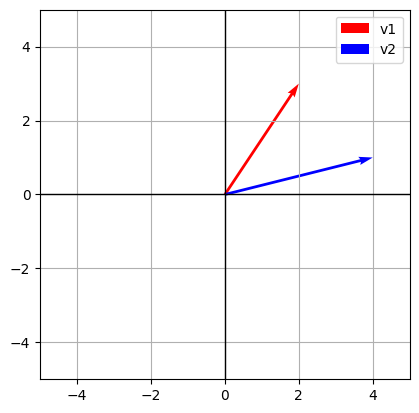

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define two vectors
v1 = np.array([2, 3])
v2 = np.array([4, 1])

# Create a plot
plt.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='r', label="v1")
plt.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='b', label="v2")

# Add axis limits
plt.xlim(-5, 5)
plt.ylim(-5, 5)

# Add labels and legend
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()

plt.show()

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++



---

## 1. **Vectors and Vector Spaces**

### **Vectors**

* **Definition**: An ordered array of numbers (elements), e.g.

  $$
  \vec{v} = \begin{bmatrix} 2 \\ -1 \\ 3 \end{bmatrix} \in \mathbb{R}^3
  $$

* **Operations**:

  * **Addition**: $\vec{a} + \vec{b}$
  * **Scalar multiplication**: $\alpha \vec{v}$
  * **Dot product**: $\vec{a} \cdot \vec{b} = \sum a_i b_i$ (produces scalar)
  * **Norm (length)**:

    $$
    \|\vec{v}\| = \sqrt{v_1^2 + v_2^2 + \dots + v_n^2}
    $$

---

### **Vector Spaces**

* **Definition**: A set of vectors closed under addition and scalar multiplication.
  Example: $\mathbb{R}^n$ is a vector space.

* **Properties**:

  * Zero vector $\vec{0}$ exists.
  * Closure under addition and scalar multiplication.
  * Contains additive inverses.
  * Distributive and associative laws hold.

---

### **Span and Linear Combinations**

* **Linear combination**: $a_1 \vec{v}_1 + a_2 \vec{v}_2 + \dots + a_k \vec{v}_k$
* **Span**: The set of all linear combinations of a set of vectors.
* Example:

  $$
  \text{span}\left\{ \begin{bmatrix} 1 \\ 0 \end{bmatrix}, \begin{bmatrix} 0 \\ 1 \end{bmatrix} \right\} = \mathbb{R}^2
  $$

---

### **Linear Independence**

* A set of vectors $\vec{v}_1, \dots, \vec{v}_k$ is **linearly independent** if:

  $$
  a_1 \vec{v}_1 + \dots + a_k \vec{v}_k = \vec{0} \Rightarrow a_1 = \dots = a_k = 0
  $$
* Otherwise, they are **linearly dependent**.

---

### **Basis and Dimension**

* **Basis**: A set of linearly independent vectors that span a vector space.
* **Dimension**: Number of vectors in a basis.

  * Example: Standard basis in $\mathbb{R}^3$:

    \begin{bmatrix}1 \ 0 \ 0\end{bmatrix} \begin{bmatrix}0 \ 1 \ 0\end{bmatrix} \begin{bmatrix}0 \ 0 \ 1\end{bmatrix}

---

### **Orthogonality**

* Two vectors are **orthogonal** if $\vec{a} \cdot \vec{b} = 0$
* **Orthonormal set**: All vectors are orthogonal and have unit norm.

---

### **Projection of a Vector**

* Projection of $\vec{a}$ onto $\vec{b}$:

  $$
  \text{proj}_{\vec{b}} \vec{a} = \frac{\vec{a} \cdot \vec{b}}{\|\vec{b}\|^2} \vec{b}
  $$

---

### **Subspaces**

* A **subspace** of $\mathbb{R}^n$ is any set that:

  * Contains the zero vector
  * Is closed under addition and scalar multiplication

---

### **Applications in ML**

| Concept       | Application                        |
| ------------- | ---------------------------------- |
| Span          | Representing feature spaces        |
| Basis         | Principal components in PCA        |
| Dimension     | Number of independent features     |
| Projection    | Dimensionality reduction           |
| Orthogonality | Independent components or features |

---

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

---

## 2. **Matrices**

### **Matrix Basics**

* **Matrix**: A rectangular array of numbers.
  Example:

  $$
  A = \begin{bmatrix}
  1 & 2 \\
  3 & 4
  \end{bmatrix}
  \in \mathbb{R}^{2 \times 2}
  $$

* **Dimensions**: Rows × Columns

---

### **Matrix Operations**

* **Addition/Subtraction**: Element-wise (same dimensions)

* **Scalar Multiplication**:

  $$
  \alpha A = \begin{bmatrix}
  \alpha a_{11} & \alpha a_{12} \\
  \alpha a_{21} & \alpha a_{22}
  \end{bmatrix}
  $$

* **Matrix Multiplication**:

  $$
  C = A \cdot B \quad \text{(valid only if columns of A = rows of B)}
  $$

* **Transpose**:

  $$
  A^T = \text{flip rows and columns}
  $$

* **Identity Matrix**:

  $$
  I_n = \text{square matrix with 1s on diagonal}
  $$

---

### **Special Matrices**

| Type            | Property Example                      |
| --------------- | ------------------------------------- |
| **Square**      | Same number of rows and columns       |
| **Diagonal**    | Non-zero entries only on diagonal     |
| **Symmetric**   | $A = A^T$                             |
| **Orthogonal**  | $A^T A = I$ (columns are orthonormal) |
| **Zero Matrix** | All elements are zero                 |

---

### **Matrix Inverse**

* For $A \in \mathbb{R}^{n \times n}$, $A^{-1}$ satisfies:

  $$
  A A^{-1} = A^{-1} A = I
  $$

* **Only exists if** $\det(A) \neq 0$ and $A$ is square.

---

### **Determinant**

* Scalar value that can be computed from a square matrix:

  $$
  \text{det}(A)
  $$

* Used to check invertibility and volume scaling.

---

### **Rank**

* Number of linearly independent rows/columns.
* Indicates the **dimension of the column space**.

---

### **Trace**

* Sum of diagonal elements of a square matrix:

  $$
  \text{tr}(A) = \sum_i a_{ii}
  $$

---

### **Eigenvalues and Eigenvectors**

* For $A \vec{v} = \lambda \vec{v}$:

  * $\lambda$: eigenvalue
  * $\vec{v}$: eigenvector

---

### **Matrix Decompositions**

| Type        | Form                   | Use Case                        |
| ----------- | ---------------------- | ------------------------------- |
| LU          | $A = LU$               | Solving systems                 |
| QR          | $A = QR$               | Least squares, orthogonal bases |
| **SVD**     | $A = U \Sigma V^T$     | PCA, compression, LSA           |
| Eigendecomp | $A = V \Lambda V^{-1}$ | PCA, diagonalization            |

---

### **Applications in ML/AI**

| Matrix Concept | Application                      |
| -------------- | -------------------------------- |
| Multiplication | Neural networks, transformations |
| Transpose      | Covariance, dot product          |
| Inverse        | Solving linear systems           |
| Rank           | Dimensionality and redundancy    |
| SVD/PCA        | Dimensionality reduction         |

---

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

---

## 3. **Linear Transformations**

---

### **What Is a Linear Transformation?**

A **linear transformation** is a function $T: \mathbb{R}^n \to \mathbb{R}^m$ that satisfies two key properties:

1. **Additivity**:

   $$
   T(\vec{u} + \vec{v}) = T(\vec{u}) + T(\vec{v})
   $$
2. **Homogeneity (scalar multiplication)**:

   $$
   T(c\vec{v}) = cT(\vec{v})
   $$

> A transformation is linear **if and only if** it preserves vector addition and scalar multiplication.

---

### **Matrix Representation of a Linear Transformation**

Every linear transformation can be represented as matrix multiplication:

$$
T(\vec{x}) = A \vec{x}
$$

* $A \in \mathbb{R}^{m \times n}$ is the **transformation matrix**.
* $\vec{x} \in \mathbb{R}^n$ is the input vector.

---

### **Common Examples of Linear Transformations**

| Transformation         | Matrix $A$                                                                          | Effect                        |
| ---------------------- | ----------------------------------------------------------------------------------- | ----------------------------- |
| Identity               | $I = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$                                  | Leaves vector unchanged       |
| Scaling                | $\begin{bmatrix} s & 0 \\ 0 & s \end{bmatrix}$                                      | Enlarges or shrinks vectors   |
| Rotation (2D)          | $\begin{bmatrix} \cos\theta & -\sin\theta \\ \sin\theta & \cos\theta \end{bmatrix}$ | Rotates vector by $\theta$    |
| Reflection (about x)   | $\begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}$                                     | Flips over x-axis             |
| Projection onto x-axis | $\begin{bmatrix} 1 & 0 \\ 0 & 0 \end{bmatrix}$                                      | Projects onto horizontal line |

---

### **Kernel and Image**

* **Kernel (null space)**: Set of vectors that map to the zero vector:

  $$
  \ker(T) = \{ \vec{x} : T(\vec{x}) = \vec{0} \}
  $$
* **Image (range)**: All vectors that are outputs of $T$:

  $$
  \text{Im}(T) = \{ T(\vec{x}) : \vec{x} \in \mathbb{R}^n \}
  $$

---

### **Properties of Linear Transformations**

| Property                      | Meaning                                                  |
| ----------------------------- | -------------------------------------------------------- |
| Linearity                     | Preserves addition and scalar multiplication             |
| Composable                    | $T_1(T_2(\vec{x})) = (T_1 \circ T_2)(\vec{x})$           |
| Invertible                    | Exists $T^{-1}$ such that $T^{-1}(T(\vec{x})) = \vec{x}$ |
| Determined by action on basis | Knowing $T(\vec{e}_i)$ is enough to define $T$           |

---

| Property       | Holds If...                                       |
| -------------- | ------------------------------------------------- |
| **One-to-One** | $\text{ker}(A) = \{\mathbf{0}\}$                  |
| **Onto**       | Columns of $A$ span $\mathbb{R}^m$                |
| **Invertible** | $A$ is square and full-rank (no zero eigenvalues) |

---

### **Application in ML and Dimensionality Reduction**

| Use Case                   | Description                                  |
| -------------------------- | -------------------------------------------- |
| **PCA**                    | Projects data to directions of max variance  |
| **Feature transformation** | Linear mappings in neural networks           |
| **Projections**            | Reduce dimensions while preserving structure |
| **Affine transformations** | Linear + translation used in computer vision |

---

### **Affine vs. Linear**

* **Linear**: $T(\vec{x}) = A\vec{x}$
* **Affine**: $T(\vec{x}) = A\vec{x} + \vec{b}$
  (not strictly linear because it doesn't preserve the origin)

---

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

---

## 4. **Eigenvalues & Eigenvectors**

---

### **Definitions**

* For a square matrix $A \in \mathbb{R}^{n \times n}$, a **non-zero vector** $\vec{v}$ is an **eigenvector** if:

$$
A\vec{v} = \lambda \vec{v}
$$

* $\lambda$ is the **eigenvalue** corresponding to eigenvector $\vec{v}$

---

### **Key Concepts**

| Concept                    | Description                                             |
| -------------------------- | ------------------------------------------------------- |
| **Eigenvalue**             | Scalar that stretches/shrinks vector $\vec{v}$          |
| **Eigenvector**            | Vector whose direction remains unchanged by $A$         |
| **Spectral Decomposition** | Decomposing matrix using its eigenvalues & eigenvectors |

---

### **How to Compute**

1. **Find eigenvalues** by solving the **characteristic equation**:

   $$
   \det(A - \lambda I) = 0
   $$

2. **Find eigenvectors** for each $\lambda$ by solving:

   $$
   (A - \lambda I)\vec{v} = 0
   $$

---

### **Geometric Interpretation**

* Matrix $A$ **transforms** space.
* Eigenvectors point in directions that are **stretched/compressed but not rotated**.
* Eigenvalues show **how much** the stretching/compressing happens.

---

### **Properties**

| Property              | Description                                                  |
| --------------------- | ------------------------------------------------------------ |
| Real symmetric matrix | Always has real eigenvalues and orthogonal eigenvectors      |
| $A$ is invertible     | If **none** of its eigenvalues are zero                      |
| Trace of $A$          | Sum of eigenvalues: $\text{tr}(A) = \sum \lambda_i$          |
| Determinant of $A$    | Product of eigenvalues: $\det(A) = \prod \lambda_i$          |
| Rank and eigenvalues  | Zero eigenvalues correspond to linearly dependent directions |

---

### **Diagonalization**

If $A$ has $n$ linearly independent eigenvectors:

$$
A = V \Lambda V^{-1}
$$

* $V$: matrix of eigenvectors
* $\Lambda$: diagonal matrix of eigenvalues

---

### **Applications**

| Field           | Use Case                                               |
| --------------- | ------------------------------------------------------ |
| PCA             | Directions of max variance (principal components)      |
| LDA             | Maximizing class separation (generalized eigenproblem) |
| Google PageRank | Dominant eigenvector of web link matrix                |
| Stability       | Dynamical systems: signs of eigenvalues                |
| Quantum Physics | Observables and states                                 |

---

### **In Python (NumPy)**

```python
import numpy as np

A = np.array([[4, 2], [1, 3]])
eigenvalues, eigenvectors = np.linalg.eig(A)
```

---

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

---

## 5. **Inner Product Spaces**

---

### **What Is an Inner Product Space?**

An **inner product space** is a vector space $V$ equipped with an **inner product**:

$$
\langle \vec{u}, \vec{v} \rangle
$$

that returns a **scalar** and satisfies specific properties.

---

### **Inner Product (Dot Product in $\mathbb{R}^n$)**

For real vectors $\vec{u}, \vec{v} \in \mathbb{R}^n$:

$$
\langle \vec{u}, \vec{v} \rangle = \sum_{i=1}^{n} u_i v_i
$$

---

### **Inner Product Axioms**

An inner product must satisfy:

| Property                  | Description                                                                                                            |
| ------------------------- | ---------------------------------------------------------------------------------------------------------------------- |
| **Linearity**             | $\langle a\vec{u} + b\vec{v}, \vec{w} \rangle = a\langle \vec{u}, \vec{w} \rangle + b\langle \vec{v}, \vec{w} \rangle$ |
| **Symmetry**              | $\langle \vec{u}, \vec{v} \rangle = \langle \vec{v}, \vec{u} \rangle$ (real case)                                      |
| **Positive-definiteness** | $\langle \vec{v}, \vec{v} \rangle \geq 0$, and equals 0 only when $\vec{v} = \vec{0}$                                  |

---

### **Norm from Inner Product**

The **norm** (length) of a vector:

$$
\|\vec{v}\| = \sqrt{\langle \vec{v}, \vec{v} \rangle}
$$

---

### **Orthogonality in Inner Product Spaces**

Vectors $\vec{u}$, $\vec{v}$ are **orthogonal** if:

$$
\langle \vec{u}, \vec{v} \rangle = 0
$$

---

### **Angle Between Vectors**

$$
\cos(\theta) = \frac{\langle \vec{u}, \vec{v} \rangle}{\|\vec{u}\| \cdot \|\vec{v}\|}
$$

Defines geometric notions of angle in abstract vector spaces.

---

### **Projection of a Vector**

Projection of $\vec{u}$ onto $\vec{v}$:

$$
\text{proj}_{\vec{v}} \vec{u} = \frac{\langle \vec{u}, \vec{v} \rangle}{\langle \vec{v}, \vec{v} \rangle} \vec{v}
$$

---

### **Inner Product Examples**

| Space                       | Inner Product Formula                           |
| --------------------------- | ----------------------------------------------- |
| $\mathbb{R}^n$              | $\sum u_i v_i$                                  |
| Complex vector space        | $\sum u_i \overline{v_i}$                       |
| Function space (e.g. $L^2$) | $\langle f, g \rangle = \int_a^b f(x)g(x)\, dx$ |

---

###  **Applications in ML & Data Science**

| Application          | Role of Inner Product                                     |
| -------------------- | --------------------------------------------------------- |
| PCA / SVD            | Finding directions with high variance (via orthogonality) |
| Kernel methods (SVM) | Generalized inner products via kernel trick               |
| Cosine similarity    | Uses normalized inner product for text/image comparison   |
| Orthogonalization    | Gram-Schmidt in inner product spaces                      |

---

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

---

## 6. **Orthogonality**

---

### **Definition**

* Two vectors $\vec{a}$ and $\vec{b}$ are **orthogonal** if:

$$
\vec{a} \cdot \vec{b} = 0
$$

This means they are **perpendicular** in Euclidean space.

---

### **Dot Product (Inner Product)**

$$
\vec{a} \cdot \vec{b} = \|\vec{a}\| \|\vec{b}\| \cos(\theta)
$$

* $= 0$ ⇨ $\theta = 90^\circ$, vectors are orthogonal
* For vectors in $\mathbb{R}^n$:

  $$
  \vec{a} \cdot \vec{b} = \sum_{i=1}^{n} a_i b_i
  $$

---

### **Orthonormal Vectors**

* Vectors are **orthonormal** if:

  * They are orthogonal
  * Each has unit length $\|\vec{v}\| = 1$

* Common in:

  * **PCA** (eigenvectors of covariance matrix)
  * **SVD** (columns of $U$ and $V$ are orthonormal)
  * **QR decomposition**

---

### **Orthogonal Matrix**

* A matrix $Q \in \mathbb{R}^{n \times n}$ is **orthogonal** if:

$$
Q^T Q = QQ^T = I
$$

* Properties:

  * Columns (and rows) are orthonormal
  * $Q^{-1} = Q^T$
  * Preserves vector norms and angles

---

### **Projection onto a Vector**

To project vector $\vec{a}$ onto vector $\vec{b}$:

$$
\text{proj}_{\vec{b}} \vec{a} = \frac{\vec{a} \cdot \vec{b}}{\|\vec{b}\|^2} \vec{b}
$$

* The **error vector** $\vec{a} - \text{proj}_{\vec{b}} \vec{a}$ is orthogonal to $\vec{b}$

---

### **Orthogonal Complement**

* The set of all vectors **orthogonal** to a subspace $W \subset \mathbb{R}^n$
* Denoted $W^\perp$

$$
W^\perp = \{ \vec{v} \in \mathbb{R}^n : \vec{v} \cdot \vec{w} = 0 \ \forall \vec{w} \in W \}
$$

---

### **Gram-Schmidt Process**

* Converts a set of linearly independent vectors into an **orthonormal basis**

Given $\vec{v}_1, \vec{v}_2, \dots, \vec{v}_n$, it produces:

$$
\vec{u}_1, \vec{u}_2, \dots, \vec{u}_n \quad \text{(orthonormal set)}
$$

---

### **Applications in ML / Data Science**

| Use Case                  | Role of Orthogonality                     |
| ------------------------- | ----------------------------------------- |
| **PCA**                   | Principal components are orthogonal       |
| **SVD**                   | Orthogonal matrices $U$, $V$              |
| **Feature decorrelation** | Improves model interpretability           |
| **Least squares**         | Projections minimize orthogonal residuals |

---

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

---

## 7. **Matrix Factorization**

---

### **What Is Matrix Factorization?**

Matrix factorization is the process of decomposing a matrix $A \in \mathbb{R}^{m \times n}$ into two (or more) matrices whose product approximates the original matrix.

$$
A \approx B \cdot C
$$

Where:

* $A$ is the matrix to be approximated (e.g., user-item ratings matrix).
* $B$ and $C$ are factorized matrices (often lower-dimensional).

---

### **Common Matrix Factorization Techniques**

1. **Singular Value Decomposition (SVD)**

   * Decomposes a matrix $A \in \mathbb{R}^{m \times n}$ into three matrices:

     $$
     A = U \Sigma V^T
     $$

     * $U$: Left singular vectors (orthogonal)
     * $\Sigma$: Diagonal matrix of singular values
     * $V^T$: Right singular vectors (orthogonal)
   * Used in **PCA** and **Latent Semantic Analysis (LSA)**.

2. **Non-negative Matrix Factorization (NMF)**

   * Decomposes $A$ into two matrices $W \in \mathbb{R}^{m \times k}$ and $H \in \mathbb{R}^{k \times n}$, where all elements are non-negative:

     $$
     A \approx W H
     $$
   * Useful for **text mining** and **image processing** (e.g., topic modeling).

3. **LU Decomposition**

   * Factorizes a square matrix $A$ into:

     $$
     A = L U
     $$

     * $L$: Lower triangular matrix
     * $U$: Upper triangular matrix
   * Common in solving linear systems of equations.

4. **QR Decomposition**

   * Decomposes $A$ into:

     $$
     A = Q R
     $$

     * $Q$: Orthogonal matrix (columns are orthonormal)
     * $R$: Upper triangular matrix
   * Used in solving least-squares problems.

5. **Cholesky Decomposition**

   * For a positive-definite matrix $A$, it is decomposed into:

     $$
     A = L L^T
     $$

     * $L$: Lower triangular matrix

---

### **Applications of Matrix Factorization**

| Use Case                     | Technique | Description                                                                  |
| ---------------------------- | --------- | ---------------------------------------------------------------------------- |
| **Recommendation Systems**   | SVD, NMF  | Factorizes user-item interaction matrix to predict ratings                   |
| **Dimensionality Reduction** | SVD, PCA  | Reduce dimensionality while preserving variance                              |
| **Topic Modeling**           | NMF       | Factorizes text data into topics, each represented as a combination of words |
| **Image Compression**        | SVD, NMF  | Decomposes image matrix to reduce storage while preserving features          |
| **Signal Processing**        | NMF, SVD  | Decomposes signals into components for analysis or denoising                 |
| **Data Compression**         | SVD, NMF  | Reduces data size while retaining most important features                    |

---

### **Key Properties of Matrix Factorization**

| Property                     | Description                                                                                        |
| ---------------------------- | -------------------------------------------------------------------------------------------------- |
| **Low-rank approximation**   | Factorization approximates matrix using fewer components                                           |
| **Sparsity**                 | NMF typically enforces sparsity (non-negative elements)                                            |
| **Uniqueness**               | In general, matrix factorization does not yield a unique solution without constraints              |
| **Computational Complexity** | Factorization techniques like SVD are computationally expensive (especially for large matrices)    |
| **Interpretability**         | Factorized matrices (especially NMF) are often easier to interpret (e.g., topics, latent features) |

---

### **How to Perform Matrix Factorization**

#### **For SVD:**

1. **Compute** $A = U \Sigma V^T$
2. **Dimensionality reduction**: Use the top $k$ singular values and vectors to approximate $A$.

   $$
   A_k \approx U_k \Sigma_k V_k^T
   $$

#### **For NMF:**

* **Objective**: Find matrices $W$ and $H$ that minimize the **Frobenius norm**:

  $$
  \| A - WH \|_F
  $$

  (i.e., the difference between the original matrix and the approximation).

* Use **gradient descent** or **alternating least squares (ALS)** methods for optimization.

---

### 🔹 **Choosing the Right Factorization Method**

| Factorization Method | Best Use Case                       | Key Advantage                           | Limitation                                   |
| -------------------- | ----------------------------------- | --------------------------------------- | -------------------------------------------- |
| **SVD**              | Dimensionality reduction, PCA       | Provides exact decomposition            | Computationally expensive for large matrices |
| **NMF**              | Text mining, topic modeling         | Interpretability (non-negative factors) | Can only handle non-negative data            |
| **LU**               | Solving systems of linear equations | Fast for square matrices                | Requires square matrices                     |
| **QR**               | Solving least-squares problems      | Computationally stable                  | Not ideal for large-scale systems            |

---

### **Example (SVD in Python)**

```python
import numpy as np

# Example matrix A
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Perform Singular Value Decomposition (SVD)
U, Sigma, Vt = np.linalg.svd(A)

# Reconstruct the matrix
A_reconstructed = np.dot(U, np.dot(np.diag(Sigma), Vt))

print("Original Matrix:\n", A)
print("Reconstructed Matrix:\n", A_reconstructed)
```

---

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

---

## 8. **Covariance and Correlation Matrices**

---

### **Covariance Matrix**

The **covariance matrix** is a square matrix that provides the covariance between pairs of variables in a dataset.

#### **Definition**:

For a dataset with $n$ variables, the covariance matrix $\Sigma$ is defined as:

$$
\Sigma = \text{cov}(\vec{X}) = \frac{1}{N-1} \sum_{i=1}^{N} (\vec{x}_i - \bar{\vec{x}})(\vec{x}_i - \bar{\vec{x}})^T
$$

Where:

* $\vec{X} = \left[ \vec{x}_1, \vec{x}_2, \dots, \vec{x}_N \right]$ is the matrix of data points, each $\vec{x}_i$ is a vector of variables.
* $\bar{\vec{x}}$ is the **mean vector** of the data points.
* $N$ is the number of data points.

---

### **Covariance Between Two Variables**

The covariance between two variables $X$ and $Y$ is:

$$
\text{cov}(X, Y) = \frac{1}{N-1} \sum_{i=1}^{N} (x_i - \bar{x})(y_i - \bar{y})
$$

* Positive covariance: As one variable increases, the other tends to increase.
* Negative covariance: As one variable increases, the other tends to decrease.
* Zero covariance: No linear relationship between variables.

---

### **Properties of Covariance Matrix**

| Property                       | Description                                                     |
| ------------------------------ | --------------------------------------------------------------- |
| **Symmetry**                   | Covariance matrix is symmetric: $\Sigma = \Sigma^T$.            |
| **Diagonal elements**          | Represent the **variance** of each variable.                    |
| **Off-diagonal elements**      | Represent the **covariance** between pairs of variables.        |
| **Positive semi-definiteness** | Covariance matrix is always positive semi-definite.             |
| **Units**                      | Covariance is in the units of the product of the two variables. |

---

### **Correlation Matrix**

The **correlation matrix** is a normalized version of the covariance matrix, where each element is divided by the product of the standard deviations of the corresponding variables.

#### **Formula**:

$$
\rho_{X,Y} = \frac{\text{cov}(X,Y)}{\sigma_X \sigma_Y}
$$

Where:

* $\rho_{X,Y}$ is the **correlation** between variables $X$ and $Y$.
* $\sigma_X$ and $\sigma_Y$ are the **standard deviations** of $X$ and $Y$, respectively.

The correlation matrix $R$ is derived by normalizing the covariance matrix:

$$
R = \text{corr}(\vec{X}) = D^{-1} \Sigma D^{-1}
$$

Where:

* $D$ is a diagonal matrix containing the standard deviations of each variable.

---

### **Properties of Correlation Matrix**

| Property     | Description                                                       |
| ------------ | ----------------------------------------------------------------- |
| **Symmetry** | Correlation matrix is symmetric: $R = R^T$.                       |
| **Range**    | The values of the correlation coefficient range between -1 and 1: |

* $\rho = 1$ means perfect positive correlation
* $\rho = -1$ means perfect negative correlation
* $\rho = 0$ means no linear correlation |
  \| **Diagonal elements**             | Always 1, as the correlation of a variable with itself is always 1. |
  \| **Interpretation**                | - Positive correlation: As one variable increases, the other tends to increase.
* Negative correlation: As one variable increases, the other tends to decrease. |
  \| **No units**                      | Correlation is a **dimensionless** quantity (scaled version of covariance). |

---

### **Key Differences Between Covariance and Correlation Matrices**

| Aspect              | Covariance Matrix                                           | Correlation Matrix                                                                |
| ------------------- | ----------------------------------------------------------- | --------------------------------------------------------------------------------- |
| **Scaling**         | Depends on the units of the variables.                      | Unit-less (scaled).                                                               |
| **Range of values** | Can take any value between $-\infty$ and $\infty$.          | Values range from -1 to 1.                                                        |
| **Interpretation**  | Direct measure of joint variability.                        | Normalized measure of linear relationship.                                        |
| **Use**             | Useful for understanding the variance-covariance structure. | Useful for comparing the strength of linear relationships across different pairs. |

---

### **Example Calculation**

Given a matrix of data with 3 variables and 4 samples:

$$
X = \begin{bmatrix}
2 & 4 & 3 \\
4 & 5 & 6 \\
3 & 7 & 8 \\
6 & 8 & 9
\end{bmatrix}
$$

1. **Step 1**: Compute the mean of each column:

   * $\bar{X_1} = 3.75$
   * $\bar{X_2} = 6$
   * $\bar{X_3} = 6.5$

2. **Step 2**: Compute the covariance between each pair of variables.

3. **Step 3**: Compute the correlation matrix by dividing each covariance by the product of the corresponding standard deviations.

---

### **Applications**

| Application                            | Description                                                          |
| -------------------------------------- | -------------------------------------------------------------------- |
| **PCA (Principal Component Analysis)** | Uses covariance matrix to find directions of maximum variance.       |
| **Portfolio Optimization**             | Correlation between assets is used to diversify risk.                |
| **Multivariate Analysis**              | Analyzing relationships and dependencies between multiple variables. |
| **Regression Analysis**                | Correlation and covariance used to evaluate predictor variables.     |
| **Machine Learning**                   | Feature selection and dimensionality reduction based on correlation. |

---

In [ ]:
import numpy as np

# Example data matrix (3 variables, 4 observations)
X = np.array([[2, 4, 3],
              [4, 5, 6],
              [3, 7, 8],
              [6, 8, 9]])

# Compute Covariance Matrix
cov_matrix = np.cov(X, rowvar=False)

# Compute Correlation Matrix
corr_matrix = np.corrcoef(X, rowvar=False)

print("Covariance Matrix:\n", cov_matrix)
print("Correlation Matrix:\n", corr_matrix)

Covariance Matrix:
 [[2.91666667 2.33333333 3.5       ]
 [2.33333333 3.33333333 4.66666667]
 [3.5        4.66666667 7.        ]]
Correlation Matrix:
 [[1.         0.74833148 0.77459667]
 [0.74833148 1.         0.96609178]
 [0.77459667 0.96609178 1.        ]]


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Principal Component Analysis (PCA)

## What is PCA?

**Principal Component Analysis (PCA)** transforms high-dimensional data into a lower-dimensional form **without losing much information**. It does this by:

* Identifying **directions (called principal components)** in which the data varies the most.
* Rotating the data to align with these new axes.
* Keeping only the top few components (dimensions) that capture the **most variance**.

---

## Intuition with an Analogy

Given a dataset with n samples and d features, PCA finds new orthogonal axes (principal components) so that:

Imagine you're looking at a 3D cloud of points (say: height, weight, and age of people). PCA finds a new coordinate system:

* PC1: the direction where the data is most spread out.
* PC2: the second most spread-out direction, orthogonal to PC1.
* And so on...

Then, it lets you **drop the less informative dimensions**, like the third one, reducing noise.

---

## Steps in PCA

1. **Standardize** the dataset (mean = 0, variance = 1).
2. **Compute covariance matrix** of the features.
3. **Find eigenvectors and eigenvalues** of the covariance matrix.
4. **Sort eigenvectors** by descending eigenvalues (importance).
5. **Project data** onto the top *k* eigenvectors.

---


## Step-by-Step Math of PCA

Let’s assume:

* $X \in \mathbb{R}^{n \times d}$ is the data matrix (each row = one sample).

### Step 1: **Standardize the Data**

Center each feature to have mean 0.

$$
X_{\text{centered}} = X - \mu
$$

Where $\mu$ is the mean vector of shape $(1 \times d)$.

---

### Step 2: **Compute Covariance Matrix**

The covariance matrix tells us how features vary together.

$$
\Sigma = \frac{1}{n-1} X_{\text{centered}}^T X_{\text{centered}} \quad \text{(shape: } d \times d \text{)}
$$

Each entry $\Sigma_{ij}$ tells how feature $i$ and $j$ vary together.

---

### Step 3: **Compute Eigenvectors and Eigenvalues**

We solve:

$$
\Sigma v = \lambda v
$$

Where:

* $v$ is an **eigenvector** (direction),
* $\lambda$ is the **eigenvalue** (how much variance is captured in that direction).

You’ll get:

* $d$ eigenvectors (principal components),
* Each with a corresponding eigenvalue.

---

### Step 4: **Sort Eigenvectors**

Sort them in **decreasing order of eigenvalues**. The eigenvector with the largest eigenvalue is **PC1**, then PC2, etc.

If you want to reduce to $k$ dimensions, pick top $k$ eigenvectors.

---

### Step 5: **Project the Data**

To reduce the dimension:

$$
Z = X_{\text{centered}} \cdot W_k
$$

Where:

* $W_k \in \mathbb{R}^{d \times k}$: top $k$ eigenvectors (columns),
* $Z \in \mathbb{R}^{n \times k}$: transformed data in reduced space.

---

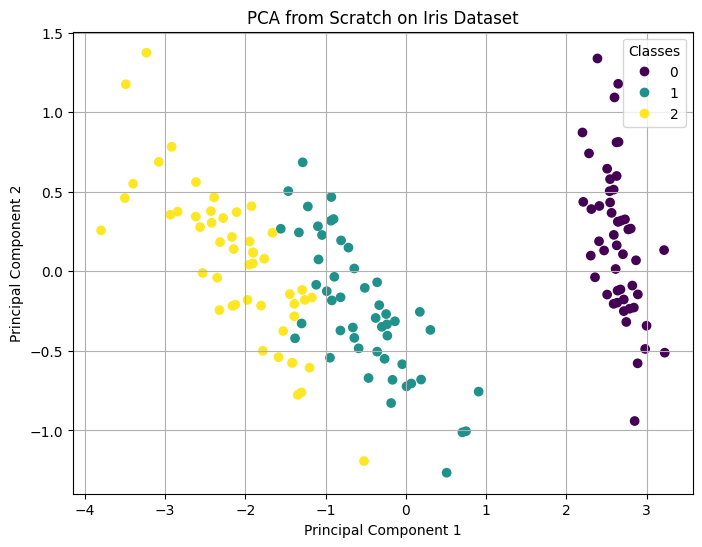

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the dataset
iris = load_iris()
X = iris.data  # shape: (150, 4)
# the dataset contains 50 samples from each of the three species
# Each sample includes measurements of sepal length, sepal width, petal length, and petal width, all in centimeters
y = iris.target  # for coloring the plot later

# Step 1: Mean centering
X_meaned = X - np.mean(X, axis=0)

# Step 2: Covariance matrix
cov_matrix = np.cov(X_meaned, rowvar=False)

# Step 3: Eigen decomposition
eigen_values, eigen_vectors = np.linalg.eigh(cov_matrix)

# Step 4: Sort eigenvectors
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvectors = eigen_vectors[:, sorted_index]
sorted_eigenvalues = eigen_values[sorted_index]

# Step 5: Select top k eigenvectors (2D projection)
k = 2
eigenvector_subset = sorted_eigenvectors[:, 0:k]

# Step 6: Transform data
X_reduced = np.dot(X_meaned, eigenvector_subset)

# Plotting
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA from Scratch on Iris Dataset")
plt.legend(*scatter.legend_elements(), title="Classes")
plt.grid(True)
plt.show()



## When to Use PCA?

* When your features are **correlated**.
* When you want to **visualize** high-dimensional data.
* When you want to **speed up model training** or remove redundancy.
* As a **preprocessing step** before clustering, classification, or anomaly detection.

---

## Bonus for ML/Research:

* PCA assumes **linearity** and maximizes **global variance**.
* In non-linear data, consider **Kernel PCA**, **t-SNE**, or **Autoencoders**.

---

## Kernel PCA


### Why Kernel PCA?

#### Problem with PCA:

* PCA only finds **linear directions** (lines, planes) of maximum variance.
* It fails when your data lies on a **non-linear manifold** (e.g., circles, spirals).

#### Solution: Use the **Kernel Trick**

* Instead of working in the input space, we **map data to a higher-dimensional space** where linear PCA *can* separate the data.
* But we don’t compute the mapping directly — we just compute **inner products using a kernel function**.

---

### Example

Suppose your data forms a circle (like a donut or non-linear form). PCA just sees a flat circle and can't separate it linearly.

But **Kernel PCA** maps it to a space where the circle becomes a line — and now PCA works!

---



### Popular Kernels

* **Linear**: $K(x, y) = x^T y$ → same as regular PCA
* **Polynomial**: $K(x, y) = (x^T y + c)^d$
* **RBF (Gaussian)**: $K(x, y) = \exp\left(-\frac{||x - y||^2}{2\sigma^2}\right)$

---




### Kernel PCA Step-by-Step

Let’s assume we have:

* $X = [x_1, x_2, ..., x_n]$: Input data points
* $\phi(x)$: A mapping to a higher-dimensional space
* We never compute $\phi(x)$ directly — instead, we use a **kernel function** $K(x_i, x_j) = \phi(x_i)^T \phi(x_j)$

### Steps

1. **Compute the Kernel Matrix** $K$, where $K_{ij} = \text{kernel}(x_i, x_j)$
$$
K(x, x') = \exp(-\gamma \|x - x'\|^2)
$$
2. **Center the Kernel Matrix** $K$
    - Given a kernel matrix $K \in \mathbb{R}^{n \times n}$, the **centered kernel matrix** $\tilde{K}$ is computed as:

$$
\tilde{K} = K - \mathbf{1}_n K - K \mathbf{1}_n + \mathbf{1}_n K \mathbf{1}_n
$$
3. **Compute eigenvectors and eigenvalues** of the centered kernel matrix
4. **Sort and select top $k$** eigenvectors
5. **Project data** into reduced feature space using the selected eigenvectors

---


(300, 2) (300,)


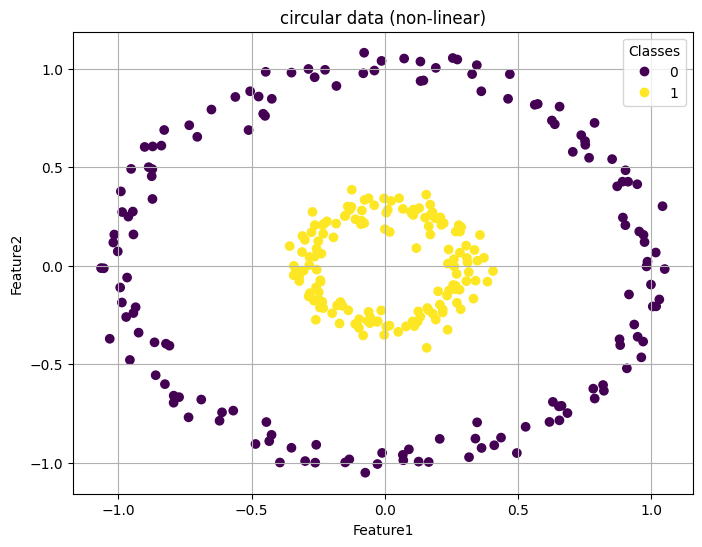

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

# Generate circular data (non-linear)
X, y = make_circles(n_samples=300, factor=0.3, noise=0.05)

print(X.shape, y.shape)



# Plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title("circular data (non-linear)")
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()

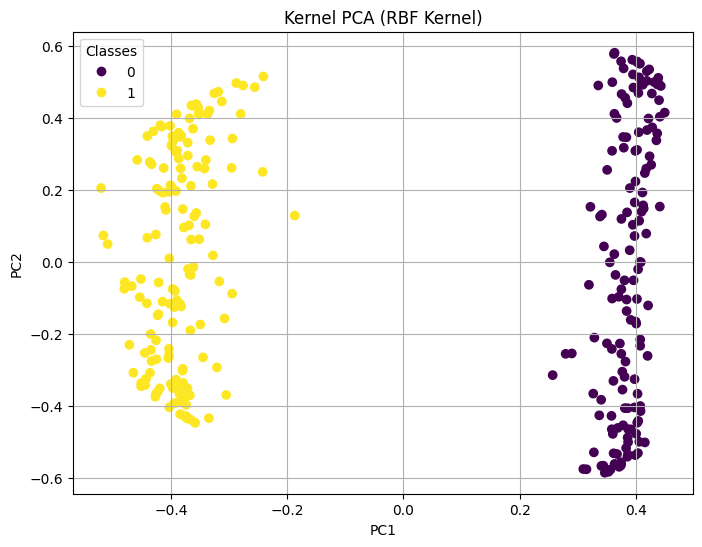

In [ ]:
# Define RBF kernel function
def rbf_kernel(X, gamma):
    # Pairwise squared Euclidean distances
    sq_dists = np.sum((X[:, np.newaxis] - X[np.newaxis, :]) ** 2, axis=2)
    # RBF Kernel
    K = np.exp(-gamma * sq_dists)
    return K

def center_kernel(K):
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K_centered = K - one_n @ K - K @ one_n + one_n @ K @ one_n
    return K_centered

def kernel_pca(X, gamma=15, n_components=2):
    # Compute RBF kernel
    K = rbf_kernel(X, gamma)

    # Center the kernel matrix
    K_centered = center_kernel(K)

    # Eigen decomposition
    eigvals, eigvecs = np.linalg.eigh(K_centered)

    # Sort in descending order
    idx = np.argsort(eigvals)[::-1]
    eigvals = eigvals[idx]
    eigvecs = eigvecs[:, idx]

    # Normalize eigenvectors (like sklearn does)
    alphas = eigvecs[:, :n_components]
    lambdas = eigvals[:n_components]

    return alphas * np.sqrt(lambdas)

X_kpca = kernel_pca(X, gamma=2, n_components=2)

# Plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, cmap='viridis')
plt.title("Kernel PCA (RBF Kernel)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## PCA using SVD


$$
A = U \Sigma V^T
$$

    U: projections onto the principal component axes
    Σ: singular values (square them to get eigenvalues)
    VT: contains the principal components (each row = one PC)

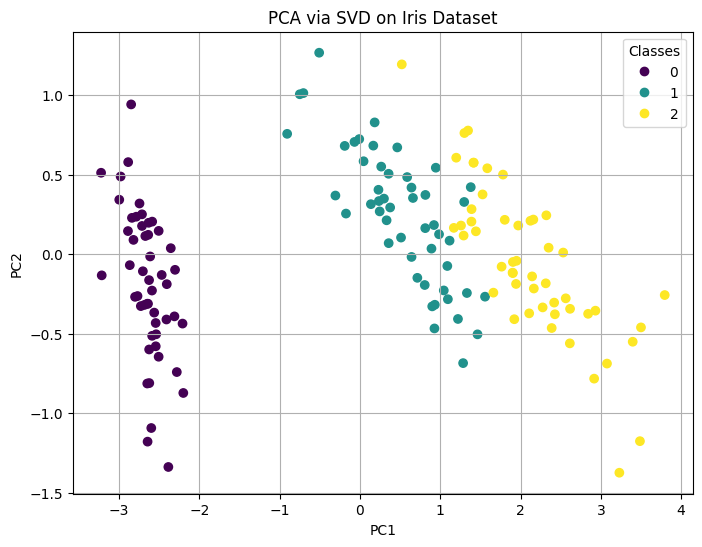

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load and center the data
iris = load_iris()
X = iris.data
X_centered = X - np.mean(X, axis=0)

U, S, VT = np.linalg.svd(X_centered)

k = 2  # number of principal components
PCs = VT[:k, :]  # top k principal components
X_reduced = np.dot(X_centered, PCs.T)

y = iris.target
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA via SVD on Iris Dataset")
plt.legend(*scatter.legend_elements(), title="Classes")
plt.grid(True)
plt.show()

# Singular Value Decomposition (SVD)

Singular Value Decomposition (SVD) is a powerful matrix factorization technique commonly used in linear algebra, data science, and machine learning. It decomposes a matrix into three simpler matrices, revealing important structural information about the original matrix. Here's a breakdown of what it is and how it works:

### Definition:

Given a matrix $A$ of size $m \times n$, SVD expresses it as the product of three matrices:

$$
A = U \Sigma V^T
$$

Where:

* $A$ is the original matrix (size $m \times n$).
* $U$ is an $m \times m$ orthogonal matrix.
* $\Sigma$ is an $m \times n$ diagonal matrix (containing the singular values on its diagonal).
* $V$ is an $n \times n$ orthogonal matrix.
* $V^T$ is the transpose of $V$.

---

### Breakdown of the components:

1. **U (Left Singular Vectors)**:
   The columns of $U$ are the **left singular vectors** of the matrix $A$. These vectors correspond to the eigenvectors of $A A^T$ (the matrix formed by multiplying $A$ with its transpose).

2. **Σ (Singular Values)**:
   The diagonal elements of $\Sigma$ are the **singular values** of $A$. These values are always non-negative real numbers and are usually ordered in decreasing order. They give you a sense of the "strength" or "importance" of each component in the matrix.

3. **V (Right Singular Vectors)**:
   The columns of $V$ are the **right singular vectors** of the matrix $A$. These vectors correspond to the eigenvectors of $A^T A$, the matrix formed by multiplying the transpose of $A$ with $A$.

---

### Geometric Interpretation:

SVD can be viewed geometrically as a series of transformations:

* The matrix $A$ maps vectors from an $n$-dimensional space to an $m$-dimensional space.
* $V^T$ first rotates (or reflects) the vectors in the original space (the domain of $A$).
* $\Sigma$ then scales these vectors along certain directions.
* Finally, $U$ rotates (or reflects) the scaled vectors into the target space.

---

### Example:

Let's say we have a matrix $A$:

$$
A = \begin{bmatrix}
1 & 2 \\
3 & 4 \\
5 & 6
\end{bmatrix}
$$

The SVD of $A$ would decompose it into:

$$
A = U \Sigma V^T
$$

Where:

* $U$ will be a $3 \times 3$ orthogonal matrix.
* $\Sigma$ will be a $3 \times 2$ diagonal matrix (containing the singular values).
* $V$ will be a $2 \times 2$ orthogonal matrix.

The singular values $\sigma_1, \sigma_2$ in $\Sigma$ represent the "strength" or significance of the corresponding singular vectors. These values are typically sorted in decreasing order, with the larger values carrying more information about the structure of $A$.

In [ ]:
import numpy as np

# Define a matrix A
A = np.array([[1, 2],
              [3, 4],
              [5, 6]])

# Perform SVD
U, S, VT = np.linalg.svd(A)

# Print the results
print("Matrix A:")
print(A)

print("\nU (Left Singular Vectors):")
print(U)

print("\nS (Singular Values):")
print(S)

print("\nVT (Right Singular Vectors Transposed):")
print(VT)

# Reconstruct the original matrix A from U, S, VT
# Note: S is a 1D array of singular values, so we need to convert it to a diagonal matrix
S_full = np.zeros_like(A, dtype=float)  # Create a matrix to hold the full S
np.fill_diagonal(S_full, S)  # Place the singular values along the diagonal

# Reconstruct A
A_reconstructed = np.dot(U, np.dot(S_full, VT))

print("\nReconstructed A:")
print(A_reconstructed)

Matrix A:
[[1 2]
 [3 4]
 [5 6]]

U (Left Singular Vectors):
[[-0.2298477   0.88346102  0.40824829]
 [-0.52474482  0.24078249 -0.81649658]
 [-0.81964194 -0.40189603  0.40824829]]

S (Singular Values):
[9.52551809 0.51430058]

VT (Right Singular Vectors Transposed):
[[-0.61962948 -0.78489445]
 [-0.78489445  0.61962948]]

Reconstructed A:
[[1. 2.]
 [3. 4.]
 [5. 6.]]



### Applications:

1. **Dimensionality Reduction** (e.g., PCA):
   SVD is used in Principal Component Analysis (PCA) to reduce the dimensionality of data by retaining the most significant singular values and corresponding vectors. This is especially useful in handling high-dimensional data like images or text.

2. **Data Compression**:
   In image compression, for example, you can use SVD to approximate the original matrix with fewer singular values, leading to significant compression while preserving much of the original structure.

3. **Recommender Systems**:
   SVD is used in collaborative filtering, especially in movie or product recommendation systems. For example, Netflix or Amazon might use it to predict ratings based on user-item interactions.

4. **Noise Reduction**:
   In signal processing, SVD can help separate signal from noise by discarding the smaller singular values that represent noise.

5. **Solving Linear Systems**:
   SVD can be used to solve linear equations, especially when the system is ill-conditioned or has no unique solution.
---

# Low-Rank Approximation

## **What is Low-Rank Approximation?**

* **Low-rank approximation** refers to approximating a matrix $A$ (of size $m \times n$) by a matrix $\hat{A}$ that has a much lower rank. The rank of a matrix is the maximum number of linearly independent rows or columns.
* The idea is to approximate the original matrix by a matrix with fewer dimensions (lower rank), which retains as much of the important information as possible.

---

## **Mathematical Formulation**

Given a matrix $A$, the goal is to approximate it by a matrix $\hat{A}$ with **rank $r$** (where $r$ is much smaller than the rank of $A$). The approximation is often performed through the **singular value decomposition** (SVD):

1. **SVD decomposition**: For a matrix $A$, you can decompose it into three matrices:

   $$
   A = U \Sigma V^T
   $$

   where:

   * $U$ and $V$ are orthogonal matrices,
   * $\Sigma$ is a diagonal matrix containing the singular values.

2. **Low-rank approximation**: A low-rank approximation $\hat{A}$ is created by keeping only the top $r$ singular values and their corresponding vectors. This is called the **truncated SVD**:

   $$
   \hat{A} = U_r \Sigma_r V_r^T
   $$

   where $U_r$, $\Sigma_r$, and $V_r$ are the matrices corresponding to the top $r$ singular values.

3. **Rank $r$ Approximation**: The matrix $\hat{A}$ will have rank $r$, and for many types of data, this approximation will be very close to the original matrix, preserving the most important patterns or structure.

---

### **Why Use Low-Rank Approximation?**

* **Dimensionality reduction**: Reducing the rank helps in reducing the number of features or dimensions, which is beneficial for visualization, clustering, or other machine learning tasks.
* **Data compression**: It can compress data (e.g., images, documents, etc.) by discarding less important features.
* **Noise reduction**: By approximating a matrix with fewer dimensions, you can often filter out noise and retain the important signal.
* **Improved performance**: In machine learning and recommendation systems, low-rank approximations (like matrix factorization) can help in improving computational efficiency and generalization.

---


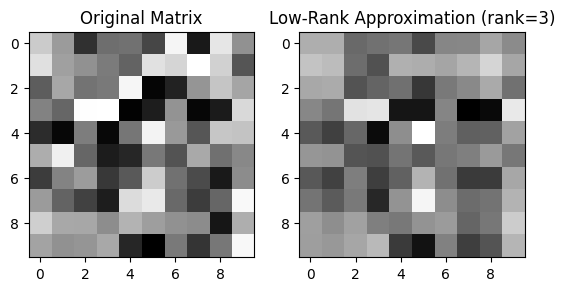

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create a random matrix A (e.g., representing some data)
A = np.random.rand(10, 10)

# Perform SVD
U, S, Vt = np.linalg.svd(A)

# Choose the rank for approximation (e.g., rank = 3)
r = 3

# Create the low-rank approximation by keeping only the top 'r' singular values
S_r = np.diag(S[:r])
U_r = U[:, :r]
Vt_r = Vt[:r, :]

# Approximate matrix A with rank r
A_approx = np.dot(U_r, np.dot(S_r, Vt_r))

# Plot the original matrix and the low-rank approximation
plt.subplot(1, 2, 1)
plt.imshow(A, cmap='gray')
plt.title("Original Matrix")

plt.subplot(1, 2, 2)
plt.imshow(A_approx, cmap='gray')
plt.title(f"Low-Rank Approximation (rank={r})")

plt.show()

In [ ]:
# Check the reconstruction
print("Reconstruction error:", np.linalg.norm(A - A_approx, 'fro'))

Reconstruction error: 1.6958439685608564


**Explanation:**

* We create a random matrix $A$.
* Perform **SVD** to decompose $A$ into $U$, $S$, and $Vt$.
* Retain only the top $r$ singular values to form the low-rank approximation.
* Visualize both the original matrix and the low-rank approximation.

---

## **Applications of Low-Rank Approximation**

1. **Principal Component Analysis (PCA)**: PCA is essentially a form of low-rank approximation applied to the covariance matrix. It projects data onto the directions (principal components) that maximize variance.

2. **Collaborative Filtering / Matrix Factorization**: In recommendation systems, low-rank matrix factorization is often used to approximate user-item interaction matrices (e.g., in Netflix or Amazon recommendations). The idea is to factorize a large, sparse matrix into two smaller matrices that approximate the original one.

3. **Image Compression**: Images are often approximated by a low-rank matrix, retaining the most significant features and reducing file sizes while maintaining image quality.

4. **Singular Value Decomposition (SVD)**: SVD itself is a method of performing low-rank approximation, often used in natural language processing, signal processing, and computer vision tasks.

---

# Non-negative Matrix Factorization (NMF)


## **What is Non-negative Matrix Factorization (NMF)?**

Non-negative Matrix Factorization (NMF) is a matrix factorization method that approximates a given non-negative matrix $A$ by two smaller non-negative matrices $W$ and $H$, such that:

$$
A \approx W H
$$

Where:

* $A \in \mathbb{R}^{m \times n}$ is the original matrix.
* $W \in \mathbb{R}^{m \times k}$ is the **basis matrix** (typically representing latent features).
* $H \in \mathbb{R}^{k \times n}$ is the **coefficient matrix** (typically representing the weights for each feature).

The key idea is that **all elements of $A$, $W$, and $H$ must be non-negative** (i.e., $A, W, H \geq 0$).

---

## **Objective Function (Loss Function)**

The goal of NMF is to minimize the difference between $A$ and $W H$, usually by minimizing the **Frobenius norm** (Euclidean distance):

$$
\| A - W H \|_F^2 = \sum_{i,j} (a_{ij} - w_i h_j)^2
$$

* **Objective**: Find $W$ and $H$ such that the reconstruction error $A - W H$ is minimized.
* **Non-negativity constraint**: Ensure $W, H \geq 0$ during the optimization.

---

In [ ]:
import numpy as np
from sklearn.decomposition import NMF

# Example matrix A (e.g., user-item ratings matrix)
A = np.array([[5, 0, 0, 3],
              [4, 0, 0, 1],
              [1, 0, 0, 2],
              [0, 0, 5, 4]])

# Apply NMF with 2 components (k=2)
model = NMF(n_components=2, init='random', random_state=42)
W = model.fit_transform(A)  # Basis matrix (user features)
H = model.components_       # Coefficients matrix (item features)

# Reconstruct the matrix A
A_reconstructed = np.dot(W, H)

print("W (basis matrix):\n", W)
print("H (coefficients matrix):\n", H)
print("Reconstructed Matrix A:\n", A_reconstructed)

W (basis matrix):
 [[3.66006042 0.14226707]
 [2.59038333 0.        ]
 [0.97740231 0.35469658]
 [0.         2.62519797]]
H (coefficients matrix):
 [[1.40727476 0.         0.         0.67246282]
 [0.         0.         1.86509283 1.57063793]]
Reconstructed Matrix A:
 [[5.15071067 0.         0.2653413  2.6847046 ]
 [3.64538109 0.         0.         1.74193647]
 [1.3754736  0.         0.66154204 1.21436661]
 [0.         0.         4.89623791 4.12323552]]


In [ ]:
# Check the reconstruction
print("Reconstruction error:", np.linalg.norm(A - A_reconstructed , 'fro'))

Reconstruction error: 1.4458723613589624


## **NMF Optimization Methods**

1. **Multiplicative Update Rule** (often used for simplicity and efficiency):

   $$
   W \leftarrow W \cdot \frac{A H^T}{W H H^T}
   $$

   $$
   H \leftarrow H \cdot \frac{W^T A}{W^T W H}
   $$

   These update rules iteratively adjust $W$ and $H$ to minimize the reconstruction error while maintaining non-negativity.

2. **Alternating Least Squares (ALS)**:

   * An iterative optimization method where $W$ and $H$ are alternately updated by fixing one matrix and solving for the other.

---

### NMF with Multiplicative Update Rule (NumPy)


   $$
   A \leftarrow W H
   $$



   $$
   Multiply\ both\ sides\ with\ H^T
   $$

   $$
   A.H^T \leftarrow W H . H^T\\
   W.(A H^T) \leftarrow W.(W H H^T)\\
   W \leftarrow W. \frac{A H^T}{W H H^T}\
   $$



   $$
   or\\
   Multiply\ both\ sides\ with\ H^T
   $$


   $$
   W^T.A \leftarrow W^T.W H\\
   H.(W^T A ) \leftarrow H.(W^T W H)\\
   H \leftarrow H. \frac{W^T A}{W^T W H}\
   $$

   These update rules iteratively adjust $W$ and $H$ to minimize the reconstruction error while maintaining non-negativity.

In [ ]:
import numpy as np

def nmf_multiplicative(A, k, max_iter=500, tol=1e-4):
    m, n = A.shape
    np.random.seed(42)

    # Initialize W and H with random non-negative values
    W = np.abs(np.random.randn(m, k))
    H = np.abs(np.random.randn(k, n))

    epsilon = 1e-10  # small constant to avoid division by zero

    for i in range(max_iter):
        # Update H
        numerator = W.T @ A
        denominator = (W.T @ W @ H) + epsilon
        H *= numerator / denominator

        # Update W
        numerator = A @ H.T
        denominator = (W @ H @ H.T) + epsilon
        W *= numerator / denominator

        # Compute reconstruction error
        error = np.linalg.norm(A - W @ H, 'fro')
        if i % 50 == 0 or i == max_iter - 1:
            print(f"Iteration {i}, Error: {error:.4f}")

        if error < tol:
            print("Converged!")
            break

    return W, H

# Create a sample non-negative matrix
A = np.abs(np.random.rand(10, 8))  # 10 samples, 8 features

# Apply NMF
W, H = nmf_multiplicative(A, k=3, max_iter=500)

# Check the reconstruction
A_approx = W @ H
print("Reconstruction error:", np.linalg.norm(A - A_approx, 'fro'))

Iteration 0, Error: 2.0934
Iteration 50, Error: 1.2214
Iteration 100, Error: 1.1916
Iteration 150, Error: 1.1886
Iteration 200, Error: 1.1878
Iteration 250, Error: 1.1874
Iteration 300, Error: 1.1872
Iteration 350, Error: 1.1870
Iteration 400, Error: 1.1867
Iteration 450, Error: 1.1864
Iteration 499, Error: 1.1860
Reconstruction error: 1.1859733909454533


### Non-negative least squares

---

We want to minimize the Frobenius norm:

$$
\min_{W \geq 0, H \geq 0} \|A - WH\|_F^2
$$

The algorithm alternates between:

1. Fixing $H$, solving for $W$
2. Fixing $W$, solving for $H$

Each subproblem is a **non-negative least squares** problem:

$$
\min_{x \geq 0} \|Ax - b\|_2^2
$$

---



When you fix $H$, updating each row of $W$ involves solving:

$$
\min_{w_i \geq 0} \|A_i - w_i H\|_2^2
$$

Where:

* $A_i$ is the $i$-th row of the matrix $A$
* You solve a **separate NNLS problem** for each row of $W$ and each column of $H$

This is done repeatedly, alternating between updating $W$ and $H$.



In [ ]:
import numpy as np
from scipy.optimize import nnls  # Non-negative least squares

def nmf_als(A, k, max_iter=200, tol=1e-4):
    m, n = A.shape
    np.random.seed(42)

    # Initialize W and H with non-negative random values
    W = np.abs(np.random.randn(m, k))
    H = np.abs(np.random.randn(k, n))

    for i in range(max_iter):
        # === Update H ===
        for j in range(n):
            H[:, j], _ = nnls(W, A[:, j])

        # === Update W ===
        for i_ in range(m):
            W[i_, :], _ = nnls(H.T, A[i_, :])

        # Compute reconstruction error
        error = np.linalg.norm(A - W @ H, 'fro')
        if i % 20 == 0 or i == max_iter - 1:
            print(f"Iteration {i}, Error: {error:.4f}")

        if error < tol:
            print("Converged!")
            break

    return W, H

# Create sample non-negative matrix
A = np.abs(np.random.rand(10, 8))

# Run ALS-based NMF
W, H = nmf_als(A, k=3)

# Check reconstruction
A_approx = W @ H
print("Final Reconstruction Error:", np.linalg.norm(A - A_approx, 'fro'))

Iteration 0, Error: 1.6492
Iteration 20, Error: 1.1973
Iteration 40, Error: 1.1910
Iteration 60, Error: 1.1889
Iteration 80, Error: 1.1857
Iteration 100, Error: 1.1850
Iteration 120, Error: 1.1849
Iteration 140, Error: 1.1848
Iteration 160, Error: 1.1846
Iteration 180, Error: 1.1846
Iteration 199, Error: 1.1846
Final Reconstruction Error: 1.184627911256426



## **Properties of NMF**

| Property                      | Description                                                                                                    |
| ----------------------------- | -------------------------------------------------------------------------------------------------------------- |
| **Non-negativity**            | All elements of $A$, $W$, and $H$ must be non-negative.                                                        |
| **Part-based representation** | NMF provides a **parts-based** representation of data (e.g., parts of images, topics in text).                 |
| **Non-linear approximation**  | NMF approximates the data using non-linear factors rather than linear combinations.                            |
| **Interpretability**          | The resulting factors (columns of $W$ and rows of $H$) often have an intuitive interpretation in many domains. |

---

## **Advantages of NMF**

* **Interpretability**: The non-negative constraints lead to interpretable components, as the factors represent additive contributions.
* **Sparsity**: NMF often results in sparse solutions, which is useful for feature selection.
* **Flexibility**: Can be applied to many domains such as text, images, audio, etc.

---

## **Limitations of NMF**

* **Non-uniqueness**: The solution might not be unique, especially if the data is noisy or if there are multiple possible factorizations.
* **Sensitive to Initialization**: The quality of the solution may depend on the initial values of $W$ and $H$.
* **Computationally Intensive**: Large-scale datasets can be computationally expensive to factorize.

---

## **Choosing the Number of Factors (Rank $k$)**

The rank $k$ determines the number of components (features) in the factorization. Selecting $k$ requires balancing:

* **Too small**: May result in underfitting and poor approximation.
* **Too large**: May lead to overfitting and computational inefficiency.

Common methods for choosing $k$:

* **Cross-validation**: Split the data and assess the reconstruction error for different values of $k$.
* **Model selection**: Use metrics such as the **explained variance** or **reconstruction error**.

---

## **Applications in Real-World Problems**

1. **Text Analysis (Topic Modeling)**:

   * Factorize a document-term matrix to extract latent topics.
   * $W$ represents topics, and $H$ represents the distribution of words in each topic.

2. **Image Compression**:

   * Factorize an image matrix into spatial features (basis) and their corresponding coefficients (intensity values).
   * Useful for reducing storage requirements in image datasets.

3. **Recommender Systems**:

   * Factorize a user-item interaction matrix to predict missing ratings or suggest items to users.
   * $W$ represents users in terms of latent features, and $H$ represents items in terms of those features.

---

# Factor Analysis (FA)

## What is Factor Analysis?

**Factor Analysis** is a method used to model **latent variables (unobserved factors)** that influence the observed data.

- It explains observed variables using a smaller number of unobserved latent variables, called factors.
- It assumes that your data is **generated by a few hidden factors**, plus **some noise**.

---

The Intuition
* Example: In psychology, instead of 20 personality questions, FA might find 2 underlying factors: "Extroversion" and "Neuroticism."

---

##  FA vs PCA (Key Difference)

| Feature    | PCA                             | Factor Analysis                                         |
| ---------- | ------------------------------- | ------------------------------------------------------- |
| Goal       | Maximize variance in components | Discover latent variables                               |
| Assumption | All variance is meaningful      | Only **shared variance** matters; noise is **separate** |
| Model Type | Linear projection               | **Probabilistic model**                                 |
| Noise      | No explicit noise modeling      | Models measurement noise explicitly                     |

---

## FA Mathematical Model

Let $\mathbf{x} \in \mathbb{R}^d$ be your observed data.
FA assumes:

$$ Observed\ variables=(linear\ combination\ of\ latent\ factors)+noise $$

$$
\mathbf{x} = \mu + \mathbf{Z} \mathbf{Λ^T} + \boldsymbol{\epsilon}
$$

Where:

* $\mu$: mean of the data
* $\mathbf{Z} \in \mathbb{R}^{d \times k} \sim \mathcal{N}(0, I)$: hidden factors (latent variables) - latent variables are standard normal
* $\mathbf{Λ} \in \mathbb{R}^{k}$:  factor loadings (weights from factors to variables)
* $\boldsymbol{\epsilon} \sim \mathcal{N}(0, \Psi)$: Gaussian **noise** with diagonal covariance $\Psi$

---

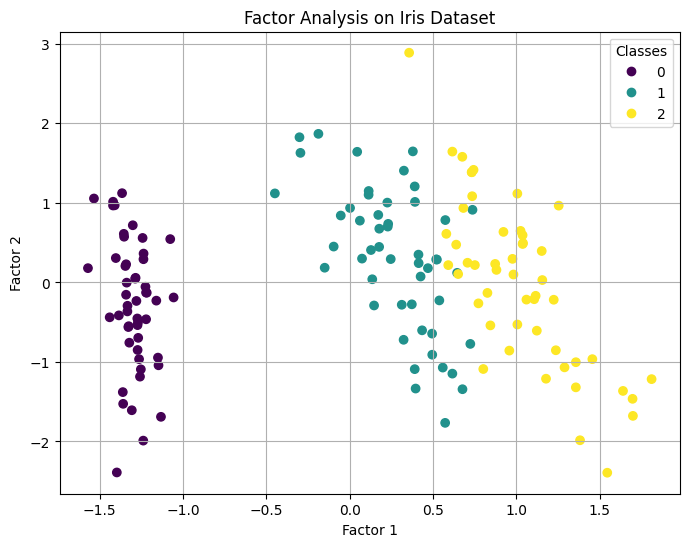

In [ ]:
from sklearn.datasets import load_iris
from sklearn.decomposition import FactorAnalysis
import matplotlib.pyplot as plt

# Load data
X, y = load_iris(return_X_y=True)

# Apply FA
fa = FactorAnalysis(n_components=2, random_state=0)
X_fa = fa.fit_transform(X)

# Plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_fa[:, 0], X_fa[:, 1], c=y, cmap='viridis')
plt.title("Factor Analysis on Iris Dataset")
plt.xlabel("Factor 1")
plt.ylabel("Factor 2")
plt.legend(*scatter.legend_elements(), title="Classes")
plt.grid(True)
plt.show()

## FA using Expectation-Maximization (EM) algorithm

Steps for FA using Expectation-Maximization (EM) algorithm

1. Initialize the latent factors Z and factor loadings Λ randomly.
2. E-step: Estimate the expected value of the latent factors Z given the current parameters.
3. M-step: Maximize the log-likelihood to update Z, Λ, and the noise ϵ.
4. Repeat until convergence.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
n, d = X.shape  # n = number of samples, d = number of features

# Center the data (mean = 0)
X_centered = X - np.mean(X, axis=0)

k = 2  # number of latent factors

# Random initialization
np.random.seed(0)
Z = np.random.randn(n, k)  # Latent factors matrix (n x k)
Lambda = np.random.randn(d, k)  # Factor loadings matrix (d x k)
Psi = np.eye(d)  # Diagonal covariance matrix of noise (d x d)

def e_step(X_centered, Lambda, Psi):
    Psi_inv = np.linalg.inv(Psi)
    term = np.linalg.inv(Lambda.T @ Psi_inv @ Lambda)
    Z = term @ Lambda.T @ Psi_inv @ X_centered
    return Z

def m_step(X_centered, Z):
    # Update Lambda (factor loadings)
    Lambda = np.linalg.inv(Z.T @ Z + np.eye(k)) @ Z.T @ X_centered

    # Update Psi (noise covariance)
    Psi = np.eye(d) * np.mean((X_centered - Z @ Lambda.T) ** 2, axis=0)

    return Lambda, Psi

def factor_analysis(X_centered, k, n_iter=100, tol=1e-4):
    # Initialize parameters
    n, d = X_centered.shape
    Z = np.random.randn(n, k)
    Lambda = np.random.randn(d, k)
    Psi = np.eye(d)

    # Iterate between E-step and M-step
    for i in range(n_iter):
        # E-step: estimate latent factors
        Z_new = e_step(X_centered, Lambda, Psi)

        # M-step: update Lambda and Psi
        Lambda_new, Psi_new = m_step(X_centered, Z_new)

        # Check for convergence
        if np.linalg.norm(Z_new - Z) < tol:
            print(f"Converged after {i+1} iterations")
            break

        Z, Lambda, Psi = Z_new, Lambda_new, Psi_new

    return Z, Lambda, Psi

# Apply Factor Analysis
Z_fa, Lambda_fa, Psi_fa = factor_analysis(X_centered, k=2)

# Plot the latent factors (reduced dimensions)
plt.figure(figsize=(8, 6))
plt.scatter(Z_fa[:, 0], Z_fa[:, 1], c=iris.target, cmap='viridis')
plt.xlabel("Latent Factor 1")
plt.ylabel("Latent Factor 2")
plt.title("Factor Analysis (Latent Factors)")
plt.grid(True)
plt.show()

## Bayesian Factor Analysis

continue reading...

# Discriminant Analysis

## Discriminant Function

A **discriminant function** is a statistical or mathematical function used in classification problems, particularly in discriminant analysis, to separate or classify data points into distinct groups or categories based on their characteristics.

    In simple terms:

    It helps answer the question: **"Given a set of features, which group or category does this item belong to?"**

---


Most commonly, the term refers to **Linear Discriminant Analysis (LDA)** where the function has the form:

$$
D(x) = w^T x + w_0
$$

* $x$: feature vector
* $w$: weight vector (coefficients)
* $w_0$: bias (intercept)

    
    The function produces a score for each class, and the class with the highest score is assigned.
---

**Types of Discriminant Analysis**

* **Linear Discriminant Analysis (LDA):** Assumes equal covariance among classes.
* **Quadratic Discriminant Analysis (QDA):** Allows different covariance matrices for each class.

---

## Linear Discriminant Analysis (LDA)



**Linear Discriminant Analysis (LDA)** is a **supervised machine learning technique** used primarily for **classification** and **dimensionality reduction**. It is used to find a linear combination of features that best separates two or more classes of objects or events.

### What is LDA?

LDA is a **dimensionality reduction** technique that is also used for **classification**. The main goal of LDA is to:

* **Maximize** the separation (or discriminability) between classes.
* **Minimize** the variation within each class.

LDA achieves this by finding a **projection** of the data onto a lower-dimensional space that maximizes the between-class variance and minimizes the within-class variance.

---

### When Do We Use LDA?

* **Classification**: LDA is widely used in classification tasks when the goal is to separate different classes.
* **Dimensionality Reduction**: LDA can reduce the number of features in the dataset while maintaining class separability. This is especially helpful in cases with high-dimensional data.
* **Face recognition** and **speech recognition** are common areas where LDA is applied.

---

### Applications of LDA

1. **Face Recognition**: In computer vision, LDA is often used to reduce the dimensionality of facial features while maximizing the differences between different faces.
2. **Medical Diagnostics**: LDA can be used to classify medical data into different categories, such as predicting the presence or absence of a disease.
3. **Speech Recognition**: LDA can be used in feature extraction to classify speech patterns and improve the performance of speech recognition systems.
4. **Finance**: In credit scoring, LDA can help in distinguishing between good and bad credit risk classes.

---

### Recap

* LDA is used for **classification** and **dimensionality reduction**, focusing on maximizing class separability.
* It computes the **within-class scatter matrix** and **between-class scatter matrix**, and uses these to find projection directions.
* LDA is widely used in **face recognition**, **speech recognition**, **finance**, and other areas.


---
### How LDA Works

    Note: Fisher’s Linear Discriminant approach

#### **1. Within-class scatter matrix $S_W$**

The **within-class scatter matrix** measures the variance within each class. It is computed as:

$$
S_W = \sum_{i=1}^{k} \sum_{x \in C_i} (x - \mu_i)(x - \mu_i)^T
$$

Where:

* $k$ is the number of classes.
* $C_i$ is the $i$-th class.
* $\mu_i$ is the mean of class $i$.

#### **2. Between-class scatter matrix $S_B$**

The **between-class scatter matrix** measures the variance between the classes. It is computed as:

$$
S_B = \sum_{i=1}^{k} N_i (\mu_i - \mu)(\mu_i - \mu)^T
$$

Where:

* $N_i$ is the number of samples in class $i$.
* $\mu_i$ is the mean of class $i$.
* $\mu$ is the overall mean of all the samples.

#### **3. Maximizing the objective function**

LDA finds the projection matrix that maximizes the **ratio of between-class variance to within-class variance**. This is equivalent to solving the following generalized eigenvalue problem:

$$
S_W^{-1} S_B w = \lambda w
$$

Where $\lambda$ are the eigenvalues and $w$ are the eigenvectors (the directions of the projections).

The top $k-1$ eigenvectors correspond to the best projections, and they form the new **lower-dimensional subspace**.

---

### Example of LDA

Let’s assume we have a 2D dataset with two classes, **Class 1** and **Class 2**.

#### Step 1: Define the Dataset

| X1  | X2  | Class |
| --- | --- | ----- |
| 2.5 | 3.4 | 1     |
| 3.1 | 3.7 | 1     |
| 2.8 | 3.2 | 1     |
| 6.0 | 4.5 | 2     |
| 5.8 | 4.3 | 2     |
| 6.3 | 4.6 | 2     |

#### Step 2: Calculate the Mean Vectors

* **Mean of Class 1** $\mu_1$ = $\left[ \frac{2.5 + 3.1 + 2.8}{3}, \frac{3.4 + 3.7 + 3.2}{3} \right]$ = $[2.8, 3.43]$
* **Mean of Class 2** $\mu_2$ = $\left[ \frac{6.0 + 5.8 + 6.3}{3}, \frac{4.5 + 4.3 + 4.6}{3} \right]$ = $[6.03, 4.47]$

#### Step 3: Compute the Within-class and Between-class Scatter Matrices

You’ll compute the scatter matrices based on the formula provided above. However, in practice, these are computed using algorithms or libraries like `scikit-learn`.

#### Step 4: Compute the Eigenvectors and Eigenvalues

You’ll solve the eigenvalue problem $S_W^{-1} S_B w = \lambda w$ to get the eigenvectors. The eigenvectors with the largest eigenvalues form the **projection directions** that will maximize class separability.

#### Step 5: Project the Data

You can project the data points onto the eigenvectors corresponding to the largest eigenvalues to get the **reduced-dimensional representation**.

---

### 🎉 Example of LDA in Python

Here’s how you can implement LDA in Python using `scikit-learn`:

```python
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Define the dataset
X = np.array([[2.5, 3.4], [3.1, 3.7], [2.8, 3.2], [6.0, 4.5], [5.8, 4.3], [6.3, 4.6]])
y = np.array([1, 1, 1, 2, 2, 2])  # Classes: 1 and 2

# Initialize the LDA model
lda = LinearDiscriminantAnalysis(n_components=1)  # We want to reduce to 1D

# Fit the model and transform the data
X_lda = lda.fit_transform(X, y)

# Print the transformed data
print("Transformed Data:")
print(X_lda)
```

This will reduce your data to a single dimension while preserving the class separability.

### Fisher’s Linear Discriminant approach!




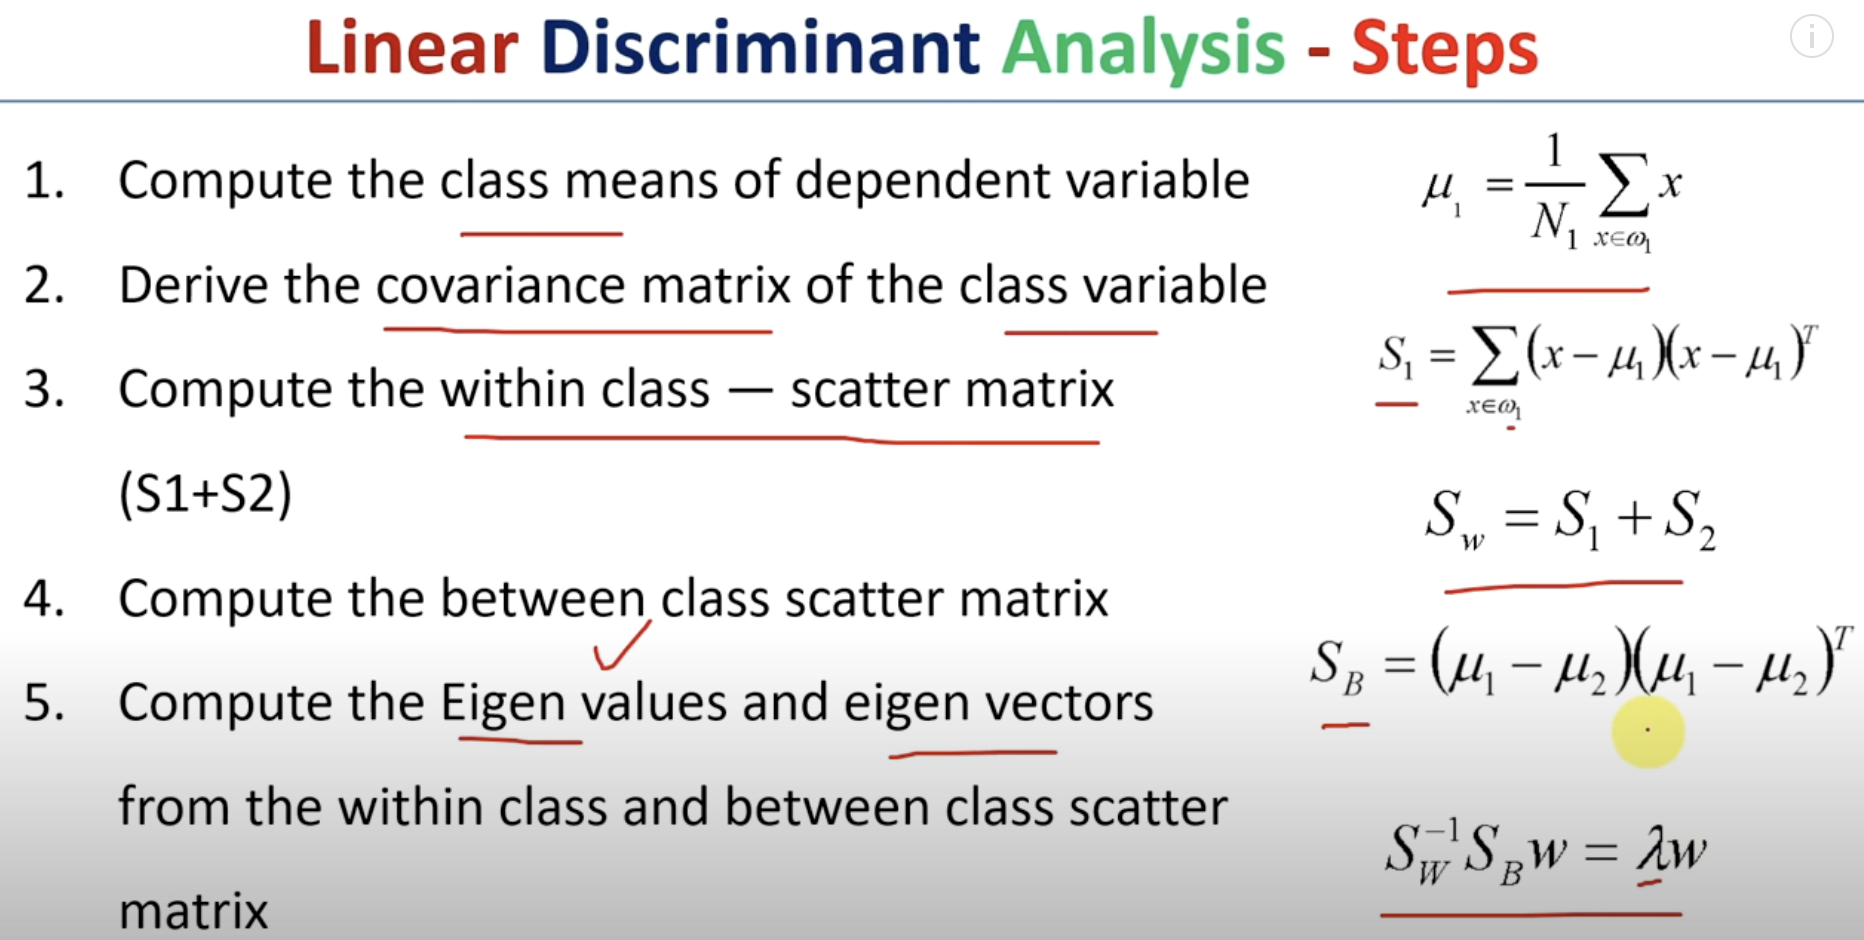

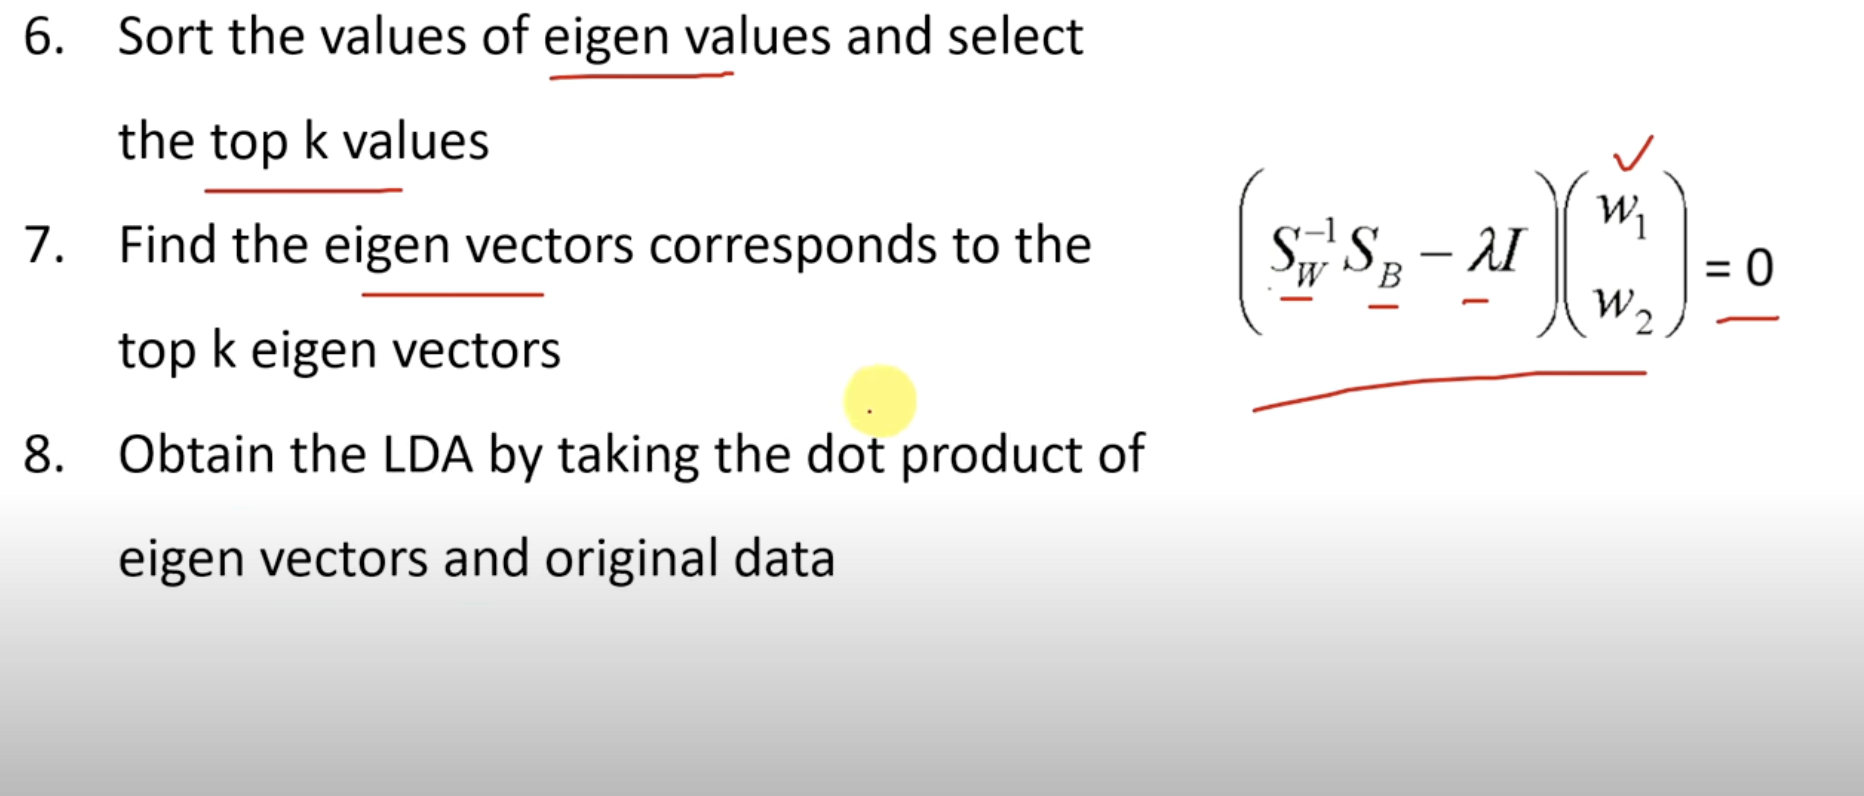


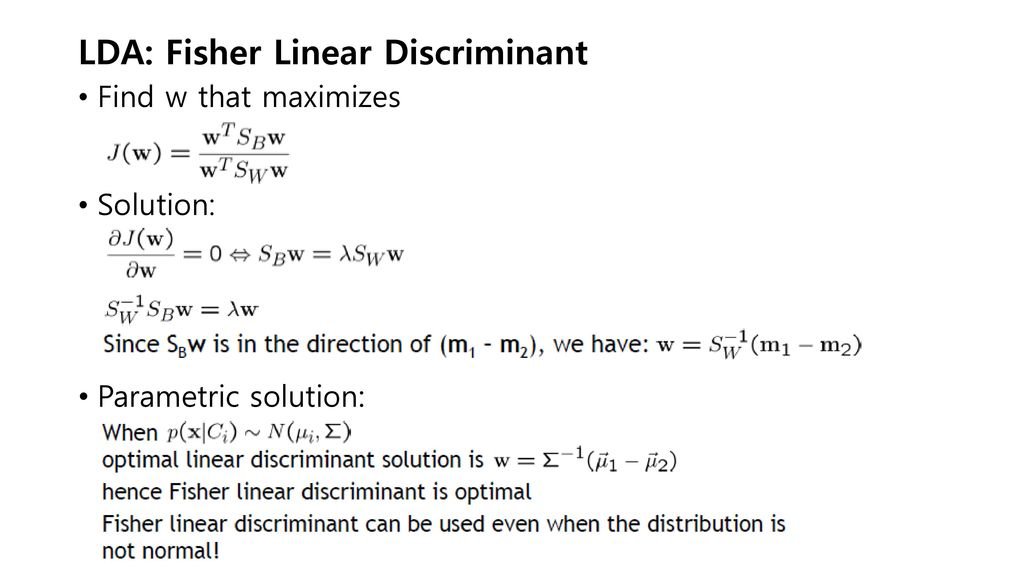



    Note: Fisher’s Linear Discriminant approach

In [ ]:
import numpy as np

class LDA:
    def __init__(self):
        self.w = None  # The projection vector

    def fit(self, X, y):
        """
        Fit the LDA model.

        Parameters:
        X (ndarray): The input features with shape (n_samples, n_features)
        y (ndarray): The target labels with shape (n_samples,)
        """
        # Get the number of classes
        classes = np.unique(y)
        n_features = X.shape[1]

        # Compute the overall mean
        mean_overall = np.mean(X, axis=0)

        # Initialize the within-class scatter matrix (S_W) and between-class scatter matrix (S_B)
        S_W = np.zeros((n_features, n_features))
        S_B = np.zeros((n_features, n_features))

        # Compute the within-class scatter matrix and between-class scatter matrix
        for c in classes:
            # Get all samples of class c
            X_c = X[y == c]
            mean_c = np.mean(X_c, axis=0)

            # Within-class scatter matrix
            S_W += np.dot((X_c - mean_c).T, (X_c - mean_c))

            # Between-class scatter matrix
            n_c = X_c.shape[0]
            mean_diff = (mean_c - mean_overall).reshape(-1, 1)
            S_B += n_c * np.dot(mean_diff, mean_diff.T)

        # Solve the eigenvalue problem: S_W^-1 * S_B
        # Compute the inverse of the within-class scatter matrix
        S_W_inv = np.linalg.inv(S_W)

        # Compute the matrix for eigenvalue problem
        M = np.dot(S_W_inv, S_B)

        # Get eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(M)

        # The eigenvector corresponding to the largest eigenvalue
        self.w = eigenvectors[:, np.argmax(eigenvalues)]

# Example Usage

# Define the dataset
X = np.array([[2.5, 3.4],
              [3.1, 3.7],
              [2.8, 3.2],
              [6.0, 4.5],
              [5.8, 4.3],
              [6.3, 4.6]])

y = np.array([1, 1, 1, 2, 2, 2])  # Class labels

# Initialize the LDA model
lda = LDA()

# Fit the model
lda.fit(X, y)

# Project the data points onto the LDA projection vector
projections = np.dot(X, self.w)

print("Projections:", projections)

Projections: [0.58655277 0.97225286 0.94553576 3.14500254 3.0639024  3.36158586]


---
---
Great Work till Now!!

    We project the data points onto the LDA projection space by calculating X⋅w, where w is the eigenvector corresponding to the largest eigenvalue.

WAIT!!

    We are still not done.

    How are you going to classify data....???

    ???

---
---

## LDA implementation using Fisher’s Linear Discriminant approach!

Fisher’s Linear Discriminant is a method to find a **linear projection** of high-dimensional data that **maximizes class separability** — specifically for **two-class problems** (can be extended to multi-class).

It is used to **project data onto a line** such that:

* **Between-class distance** is maximized
* **Within-class scatter** is minimized

---

🔧 Goal: Find projection vector $\mathbf{w}$

Given:

* Two class means: $\mu_1, \mu_2$
* Two class scatter matrices: $S_1, S_2$

We define:

* **Within-class scatter matrix**:

  $$
  S_W = S_1 + S_2
  $$

* **Between-class scatter matrix**:

  $$
  S_B = (\mu_1 - \mu_2)(\mu_1 - \mu_2)^T
  $$

🧾 Fisher’s Criterion:

Find $\mathbf{w}$ that maximizes:

$$
J(\mathbf{w}) = \frac{\mathbf{w}^T S_B \mathbf{w}}{\mathbf{w}^T S_W \mathbf{w}}
$$

This is maximized when:

$$
\mathbf{w} = S_W^{-1} (\mu_1 - \mu_2)
$$

---

✅ Classification

Once you compute the projection vector $\mathbf{w}$, classify $x$ as:

* Project $x$ to $w^T x$
* Choose threshold (e.g., midpoint between projected means)
* Compare projection to threshold

---


Key Difference in Output

- Fisher's LDA projects data → separates along a line.
- Regular LDA classifies data based on Gaussian likelihoods.

In [ ]:
import numpy as np

class FisherLDA:
    def __init__(self):
        self.w = None  # Projection vector
        self.threshold = None  # Classification threshold

    def fit(self, X, y):
        # Split the data
        X1 = X[y == 0]
        X2 = X[y == 1]

        # Compute means
        mu1 = np.mean(X1, axis=0)
        mu2 = np.mean(X2, axis=0)

        # Compute within-class scatter matrices
        S1 = np.dot((X1 - mu1).T, (X1 - mu1))
        S2 = np.dot((X2 - mu2).T, (X2 - mu2))
        S_W = S1 + S2

        # Compute optimal projection direction
        self.w = np.linalg.inv(S_W) @ (mu1 - mu2)

        # Project means and compute threshold
        proj1 = self.w.T @ mu1
        proj2 = self.w.T @ mu2
        self.threshold = (proj1 + proj2) / 2

    def predict(self, X):
        proj = X @ self.w
        return (proj >= self.threshold).astype(int)

# Example
X = np.array([[2.5, 3.4],
              [3.1, 3.7],
              [2.8, 3.2],
              [6.0, 4.5],
              [5.8, 4.3],
              [6.3, 4.6]])
y = np.array([0, 0, 0, 1, 1, 1])

fld = FisherLDA()
fld.fit(X, y)
print("Fisher LDA predictions:", fld.predict(X))

## How do you classify Data?

Great question!

Recall Discriminant Function


A **discriminant function** $\delta_k(x)$ scores how likely a sample $x$ belongs to class $k$.
You assign $x$ to the class that **maximizes** $\delta_k(x)$.

    The function produces a score for each class, and the class with the highest score is assigned.


Let’s break down the **Discriminant Functions** used in **LDA**, **QDA**, and **GDA**, and see how they differ mathematically and geometrically.

---

---

**🔷 LDA (Linear Discriminant Analysis)**

**Assumption**:

* Each class follows a **Gaussian distribution**.
* All classes **share the same covariance matrix** $\Sigma$.

**Discriminant Function:**

$$
\delta_k(x) = x^T \Sigma^{-1} \mu_k - \frac{1}{2} \mu_k^T \Sigma^{-1} \mu_k + \log \phi_k
$$

Where:

* $\mu_k$: Mean of class $k$
* $\Sigma$: Shared covariance matrix
* $\phi_k$: Prior probability of class $k$

Properties:

* **Linear decision boundary** (hyperplane).
* Good when class covariances are similar.

---

🔷 QDA (Quadratic Discriminant Analysis)


**Assumption**:

* Each class has its **own covariance matrix** $\Sigma_k$.
* Still assumes Gaussian class-conditional distributions.

**Discriminant Function:**

$$
\delta_k(x) = -\frac{1}{2} \log |\Sigma_k| - \frac{1}{2}(x - \mu_k)^T \Sigma_k^{-1}(x - \mu_k) + \log \phi_k
$$

Properties:

* **Quadratic decision boundaries**.
* More flexible but needs more data to estimate each $\Sigma_k$.

---

🔷 **GDA (Gaussian Discriminant Analysis)**

This is actually a **family** of models:

* If $\Sigma_k = \Sigma$: it's **LDA**
* If each class has its own $\Sigma_k$: it's **QDA**

So **GDA** encompasses both **LDA** and **QDA** depending on the covariance assumption.

---

⚖️ Summary Table:

| Model   | Covariance Assumption     | Discriminant Function Type | Decision Boundary |
| ------- | ------------------------- | -------------------------- | ----------------- |
| **LDA** | Shared $\Sigma$           | Linear in $x$              | Linear            |
| **QDA** | Class-specific $\Sigma_k$ | Quadratic in $x$           | Quadratic         |
| **GDA** | General (can be both)     | Linear or Quadratic        | Depends           |

---


## Quadratic Discriminant Analysis (QDA)

QDA is a **generative classification algorithm** that models each class as a **Gaussian distribution with its own covariance matrix**. It’s powerful when different classes have different spread and orientation in feature space.

---

📌 Assumptions:

* Each class $y = k$ generates data from a **multivariate normal distribution**:

  $$
  P(x \mid y = k) = \mathcal{N}(x \mid \mu_k, \Sigma_k)
  $$

* Each class has:

  * **Own mean** $\mu_k$
  * **Own covariance matrix** $\Sigma_k$
  * **Prior probability** $\phi_k = P(y = k)$

---

🧾 QDA Discriminant Function

The **discriminant function** used to classify a sample $x$ is:

$$
\delta_k(x) = -\frac{1}{2} \log |\Sigma_k| - \frac{1}{2} (x - \mu_k)^T \Sigma_k^{-1} (x - \mu_k) + \log \phi_k
$$

This combines:

* A **quadratic Mahalanobis distance** term
* A **normalization** term from the Gaussian log-density
* A **log prior** for class probabilities

---

✅ Classification Rule:

Assign a point $x$ to the class with the **highest** $\delta_k(x)$.

---

🧠 When to Use QDA?

* When classes have **different shapes or variances**.
* When you have enough data to estimate separate covariance matrices.
* When LDA’s **linear decision boundary is too rigid**.

---

In [ ]:
import numpy as np

class QDA:
    def __init__(self):
        self.phi = {}       # Class priors
        self.mu = {}        # Class means
        self.sigma = {}     # Class-specific covariance matrices
        self.classes = None

    def fit(self, X, y):
        self.classes = np.unique(y)
        n = X.shape[0]

        for cls in self.classes:
            X_c = X[y == cls]
            self.phi[cls] = X_c.shape[0] / n
            self.mu[cls] = np.mean(X_c, axis=0)
            self.sigma[cls] = np.cov(X_c.T, bias=True)  # bias=True for MLE

    def predict(self, X):
        preds = []
        for x in X:
            scores = {}
            for cls in self.classes:
                mu_k = self.mu[cls]
                sigma_k = self.sigma[cls]
                inv_sigma_k = np.linalg.inv(sigma_k)
                det_sigma_k = np.linalg.det(sigma_k)

                # QDA discriminant function
                diff = x - mu_k
                term1 = -0.5 * np.log(det_sigma_k)
                term2 = -0.5 * diff.T @ inv_sigma_k @ diff
                term3 = np.log(self.phi[cls])
                scores[cls] = term1 + term2 + term3

            preds.append(max(scores, key=scores.get))
        return np.array(preds)

# Sample Usage
X = np.array([[2.5, 3.4],
              [3.1, 3.7],
              [2.8, 3.2],
              [6.0, 4.5],
              [5.8, 4.3],
              [6.3, 4.6]])

y = np.array([1, 1, 1, 2, 2, 2])

qda = QDA()
qda.fit(X, y)
predictions = qda.predict(X)

print("QDA Predictions:", predictions)

QDA Predictions: [1 1 1 2 2 2]


## Linear Discriminant Analysis (LDA)


LDA is a **generative classifier** that models each class as a **Gaussian distribution**, but with a **shared covariance matrix** across all classes.

---

📌 LDA Assumptions:

* Each class $y = k$ is generated from a **multivariate normal distribution**:

  $$
  P(x \mid y = k) = \mathcal{N}(x \mid \mu_k, \Sigma)
  $$

* All classes share the same covariance matrix $\Sigma$, but have different means $\mu_k$ and priors $\phi_k$.

---

🧾 LDA Discriminant Function

The LDA **discriminant function** for class $k$ is:

$$
\delta_k(x) = x^T \Sigma^{-1} \mu_k - \frac{1}{2} \mu_k^T \Sigma^{-1} \mu_k + \log \phi_k
$$

You classify $x$ by:

$$
\hat{y} = \arg\max_k \delta_k(x)
$$

---

✅ Properties

| Feature             | LDA                                                   |
| ------------------- | ----------------------------------------------------- |
| Covariance          | Shared across all classes                             |
| Decision Boundary   | **Linear**                                            |
| Computational Cost  | Lower than QDA                                        |
| Geometric Intuition | Projects onto direction maximizing class separability |

---

In [ ]:
import numpy as np

class LDA:
    def __init__(self):
        self.mu = {}
        self.phi = {}
        self.sigma = None
        self.classes = None

    def fit(self, X, y):
        self.classes = np.unique(y)
        n, d = X.shape
        self.sigma = np.zeros((d, d))

        for cls in self.classes:
            X_c = X[y == cls]
            self.mu[cls] = np.mean(X_c, axis=0)
            self.phi[cls] = X_c.shape[0] / n
            self.sigma += np.dot((X_c - self.mu[cls]).T, (X_c - self.mu[cls]))

        self.sigma /= n  # MLE estimate

    def predict(self, X):
        inv_sigma = np.linalg.inv(self.sigma)
        predictions = []

        for x in X:
            scores = {}
            for cls in self.classes:
                mu_k = self.mu[cls]
                phi_k = self.phi[cls]

                # LDA discriminant function
                term1 = x.T @ inv_sigma @ mu_k
                term2 = 0.5 * mu_k.T @ inv_sigma @ mu_k
                term3 = np.log(phi_k)
                scores[cls] = term1 - term2 + term3

            predictions.append(max(scores, key=scores.get))

        return np.array(predictions)

# Example
X = np.array([[2.5, 3.4],
              [3.1, 3.7],
              [2.8, 3.2],
              [6.0, 4.5],
              [5.8, 4.3],
              [6.3, 4.6]])
y = np.array([1, 1, 1, 2, 2, 2])

lda = LDA()
lda.fit(X, y)
print("LDA Predictions:", lda.predict(X))

LDA Predictions: [1 1 1 2 2 2]



## LDA vs QDA

| Feature             | LDA                       | QDA              |
| ------------------- | ------------------------- | ---------------- |
| Covariance          | Shared across classes     | Unique per class |
| Decision Boundaries | Linear                    | Quadratic        |
| Robustness          | More stable on small data | Needs more data  |

---

## Gaussian Discriminant Analysis (GDA)

**GDA** is the **general framework** for classification where:

* Each class is modeled with a **multivariate Gaussian** distribution.
* Parameters $\mu_k$, $\Sigma_k$, and class prior $\phi_k$ are estimated from the data.
* The classifier is built using **Bayes' theorem**.

> GDA becomes **LDA** when all classes share the same covariance matrix.
> GDA becomes **QDA** when each class has its own covariance matrix.

---

📌 GDA Assumptions

For each class $y = k$:

$$
P(x \mid y = k) = \mathcal{N}(x \mid \mu_k, \Sigma_k)
$$

$$
P(y = k) = \phi_k
$$

Then using Bayes’ rule:

$$
P(y = k \mid x) = \frac{P(x \mid y = k) \cdot P(y = k)}{\sum_j P(x \mid y = j) \cdot P(y = j)}
$$

---

GDA Discriminant Function

General Form:

$$
\delta_k(x) = \log P(x \mid y = k) + \log \phi_k
$$

Since:

$$
P(x \mid y = k) = \frac{1}{(2\pi)^{d/2} |\Sigma_k|^{1/2}} \exp\left(-\frac{1}{2} (x - \mu_k)^T \Sigma_k^{-1} (x - \mu_k)\right)
$$

Taking the log:

$$
\delta_k(x) = -\frac{1}{2} \log |\Sigma_k| - \frac{1}{2}(x - \mu_k)^T \Sigma_k^{-1}(x - \mu_k) + \log \phi_k
$$

---

✅ GDA Classification Rule

Assign to the class with the highest discriminant function:

$$
\hat{y} = \arg\max_k \delta_k(x)
$$

---

✅ When to Use GDA

| Use Case                                           | Recommended                      |
| -------------------------------------------------- | -------------------------------- |
| Classes with different shapes, orientations        | ✅ QDA (GDA with $\Sigma_k$)      |
| Simpler, less data, equal spreads                  | ✅ LDA (GDA with shared $\Sigma$) |
| You want a **generative** probabilistic classifier | ✅ GDA                            |

---


In [ ]:
import numpy as np

class GDA:
    def __init__(self, shared_covariance=True):
        self.shared_covariance = shared_covariance  # True → LDA, False → QDA
        self.mu = {}        # Class means
        self.sigma = {}     # Covariance matrices
        self.phi = {}       # Class priors
        self.classes = None

    def fit(self, X, y):
        self.classes = np.unique(y)
        n, d = X.shape

        # Initialize shared or individual covariance
        if self.shared_covariance:
            self.sigma = np.zeros((d, d))
        else:
            self.sigma = {}

        for cls in self.classes:
            X_k = X[y == cls]
            self.mu[cls] = np.mean(X_k, axis=0)
            self.phi[cls] = X_k.shape[0] / n

            sigma_k = np.cov(X_k.T, bias=True)

            if self.shared_covariance:
                self.sigma += sigma_k * X_k.shape[0]  # Weighted sum
            else:
                self.sigma[cls] = sigma_k

        if self.shared_covariance:
            self.sigma /= n  # Final pooled covariance

    def _discriminant(self, x, cls):
        mu_k = self.mu[cls]
        phi_k = self.phi[cls]

        if self.shared_covariance:
            sigma = self.sigma
        else:
            sigma = self.sigma[cls]

        inv_sigma = np.linalg.inv(sigma)
        det_sigma = np.linalg.det(sigma)
        diff = x - mu_k

        term1 = -0.5 * np.log(det_sigma + 1e-9)
        term2 = -0.5 * diff.T @ inv_sigma @ diff
        term3 = np.log(phi_k)

        return term1 + term2 + term3

    def predict(self, X):
        preds = []
        for x in X:
            scores = {cls: self._discriminant(x, cls) for cls in self.classes}
            preds.append(max(scores, key=scores.get))
        return np.array(preds)


# Sample dataset
X = np.array([[2.5, 3.4],
              [3.1, 3.7],
              [2.8, 3.2],
              [6.0, 4.5],
              [5.8, 4.3],
              [6.3, 4.6]])
y = np.array([0, 0, 0, 1, 1, 1])

# Try both modes:
gda_lda = GDA(shared_covariance=True)   # LDA behavior
gda_qda = GDA(shared_covariance=False)  # QDA behavior

# Fit models
gda_lda.fit(X, y)
gda_qda.fit(X, y)

# Predictions
print("LDA-style GDA Predictions:", gda_lda.predict(X))
print("QDA-style GDA Predictions:", gda_qda.predict(X))

LDA-style GDA Predictions: [0 0 0 1 1 1]
QDA-style GDA Predictions: [0 0 0 1 1 1]


## LDA vs QDA vs GDA

| Method  | Covariance Assumption     | Discriminant Function Type    | Decision Boundary     |
| ------- | ------------------------- | ----------------------------- | --------------------- |
| **LDA** | Shared $\Sigma$           | Linear                        | Linear                |
| **QDA** | Class-specific $\Sigma_k$ | Quadratic                     | Quadratic             |
| **GDA** | General Gaussian          | Linear or Quadratic (depends) | Depends on covariance |

---

#t-SNE

https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf

t-SNE (t-Distributed Stochastic Neighbor Embedding) is a dimensionality reduction technique, especially useful for **visualizing high-dimensional data** in 2D or 3D.

### Mathematical Foundation of t-SNE

The math behind t-SNE is centered on **probability distributions** and how to **preserve local structures** of the data when reducing dimensions. Here's a breakdown:

### 1. **Pairwise Similarity in High-Dimensional Space**

First, we calculate the **pairwise similarities** between the data points in the original high-dimensional space.

Let’s denote the data points as $x_1, x_2, ..., x_N$, where each $x_i \in \mathbb{R}^D$, and $D$ is the number of dimensions.

For each pair of points $(x_i, x_j)$, we calculate the **conditional probability** that $x_j$ would be a neighbor of $x_i$ using a Gaussian distribution centered around $x_i$. The formula for this probability is:

$$
p_{ij} = \frac{\exp\left(-\frac{||x_i - x_j||^2}{2\sigma_i^2}\right)}{\sum_{k \neq i} \exp\left(-\frac{||x_i - x_k||^2}{2\sigma_i^2}\right)}
$$

* $\sigma_i$ is the **variance** of the Gaussian for point $x_i$, which controls the width of the neighborhood around each point.
* The denominator is a normalization term that ensures the probabilities sum to 1.

### 2. **Symmetrize the Similarities**

Once the pairwise conditional probabilities are computed, we **symmetricize** the probabilities to ensure that the similarity between $x_i$ and $x_j$ is the same as that between $x_j$ and $x_i$. This is done by averaging the values:

$$
p_{ij} = \frac{p_{ij} + p_{ji}}{2}
$$

Thus, $p_{ij}$ is the symmetric probability that $x_i$ and $x_j$ are similar.

### 3. **Map to Low-Dimensional Space**

In the low-dimensional space, we want to map each data point $y_1, y_2, ..., y_N$ (where each $y_i \in \mathbb{R}^2$ or $\mathbb{R}^3$) while trying to preserve the pairwise similarities. The key idea is to create a **probability distribution** over the points in this lower-dimensional space that reflects the **pairwise similarities**.

For the lower-dimensional points, we compute the **Student’s t-distribution** with **1 degree of freedom (Cauchy distribution)**, which has **heavier tails** compared to a Gaussian. This helps in keeping distant points apart more effectively.

The probability of similarity between two points $y_i$ and $y_j$ in the low-dimensional space is:

$$
q_{ij} = \frac{(1 + \|y_i - y_j\|^2)^{-1}}{\sum_{k \neq l} (1 + \|y_k - y_l\|^2)^{-1}}
$$

This distribution is similar to a Gaussian, but the heavy tails (due to the t-distribution) help better preserve the global structure of data.

### 4. **Minimizing the Kullback-Leibler (KL) Divergence**

Now, the goal is to **minimize the difference** between the **high-dimensional similarity distribution** $p_{ij}$ and the **low-dimensional similarity distribution** $q_{ij}$. We do this by minimizing the **Kullback-Leibler (KL) divergence**:

$$
\text{KL}(P \parallel Q) = \sum_{i \neq j} p_{ij} \log \frac{p_{ij}}{q_{ij}}
$$

This measures how different the two probability distributions are. The optimization is done in such a way that the points that were close in high dimensions stay close in low dimensions, and those that were far away stay far apart.

### 5. **Gradient Descent Optimization**

Since the KL divergence is not convex (it has many local minima), **gradient descent** is used to optimize the positions of the points in the low-dimensional space. The gradient of the KL divergence with respect to the position of each point $y_i$ is computed, and the positions are updated iteratively to minimize the KL divergence.

### 6. **Perplexity and Tuning**

* **Perplexity** is an important hyperparameter in t-SNE. It controls the number of nearest neighbors to consider when calculating the conditional probability $p_{ij}$. The perplexity defines the smoothness of the probability distribution, and the larger the perplexity, the broader the neighborhood.
* The choice of **learning rate** also plays a crucial role in the convergence of t-SNE.

### Summary of Key Points:

1. **Compute pairwise similarities** in high-dimensional space using a Gaussian.
2. **Symmetrize** the similarity matrix.
3. **Map to lower dimensions** using a Student's t-distribution.
4. **Minimize KL divergence** between the high- and low-dimensional similarity distributions via gradient descent.

---

In [ ]:
import numpy as np

# Step 1: Compute pairwise similarity in high-dimensional space (using Gaussian kernel)
def compute_pairwise_affinities(X, perplexity=30.0):
    # Number of data points
    n = X.shape[0]

    # Compute pairwise distances (squared Euclidean distance)
    distances = np.linalg.norm(X[:, np.newaxis] - X, axis=2) ** 2

    # Compute the conditional probabilities (p_ij)
    p = np.zeros((n, n))
    for i in range(n):
        # Compute the sigma (variance) for each point using perplexity
        # We use binary search to find the right value of sigma
        beta = 1.0  # Start with a high precision
        tolerance = 1e-5
        max_iter = 50
        for _ in range(max_iter):
            # Compute the Gaussian similarity
            exp_dist = np.exp(-distances[i] * beta)
            exp_dist[i] = 0  # Avoid self-similarity
            sum_exp_dist = np.sum(exp_dist)

            # Compute entropy
            H = np.log(sum_exp_dist) + beta * np.sum(distances[i] * exp_dist) / sum_exp_dist

            # Adjust the beta based on the entropy to match the target perplexity
            if H > np.log(perplexity):
                beta *= 1.1
            else:
                beta *= 0.9

            if np.abs(H - np.log(perplexity)) < tolerance:
                break

        # Store the similarity
        p[i] = exp_dist / np.sum(exp_dist)

    # Symmetrize the matrix (p_ij + p_ji) / 2
    p = (p + p.T) / (2 * n)

    return p

# Step 2: Compute pairwise similarities in low-dimensional space (using Student's t-distribution)
def compute_low_dim_affinities(Y):
    n = Y.shape[0]
    distances = np.linalg.norm(Y[:, np.newaxis] - Y, axis=2) ** 2
    q = 1 / (1 + distances)  # Student's t-distribution (1 degree of freedom)
    np.fill_diagonal(q, 0)  # Set diagonal to 0 to avoid self-similarity
    q /= np.sum(q)  # Normalize to get a probability distribution
    return q

# Step 3: Compute the gradient of the KL divergence
def compute_gradient(Y, p, q):
    n = Y.shape[0]
    gradient = np.zeros_like(Y)

    # Compute pairwise distance in low-dimensional space (for the gradient calculation)
    distances = np.linalg.norm(Y[:, np.newaxis] - Y, axis=2) ** 2
    dist_term = (1 + distances) ** -2

    for i in range(n):
        for j in range(n):
            if i != j:
                # Compute the gradient contribution for point i
                dP = 4 * (p[i, j] - q[i, j]) * dist_term[i, j] * (Y[i] - Y[j])
                gradient[i] += dP

    return gradient

# Step 4: Optimize the low-dimensional representation using gradient descent
def tsne(X, n_iter=1000, learning_rate=100.0, perplexity=30.0):
    # Initialize low-dimensional data (random initialization)
    n, d = X.shape
    Y = np.random.randn(n, 2)  # Initialize in 2D space

    # Compute pairwise similarities in high-dimensional space
    p = compute_pairwise_affinities(X, perplexity)

    # Perform gradient descent to optimize the low-dimensional embedding
    for i in range(n_iter):
        q = compute_low_dim_affinities(Y)  # Compute the t-distribution similarities in low-dim
        gradient = compute_gradient(Y, p, q)  # Compute the gradient of KL divergence

        # Update the low-dimensional points using the gradient
        Y -= learning_rate * gradient

        # Periodic logging of progress (optional)
        if (i + 1) % 100 == 0:
            loss = np.sum(p * np.log(p / q))  # KL divergence loss
            print(f"Iteration {i + 1}/{n_iter}, Loss: {loss}")

    return Y

# Example usage:
if __name__ == "__main__":
    # Example data (random points in 5D space)
    np.random.seed(0)
    X = np.random.randn(100, 5)  # 100 points in 5D space

    # Run t-SNE
    Y_2D = tsne(X, n_iter=1000, learning_rate=500.0, perplexity=30.0)

    # Visualize the result (2D embedding)
    import matplotlib.pyplot as plt
    plt.scatter(Y_2D[:, 0], Y_2D[:, 1])
    plt.title("t-SNE Visualization")
    plt.show()

Use Cases:
- Visualizing image datasets (e.g., MNIST digits)
- Understanding word embeddings (e.g., Word2Vec vectors)
- Exploring gene expression data
- Clustering results of unsupervised learning

<ipython-input-17-e14ffb13b439>:27: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  plt.legend(handles, labels=iris.target_names)


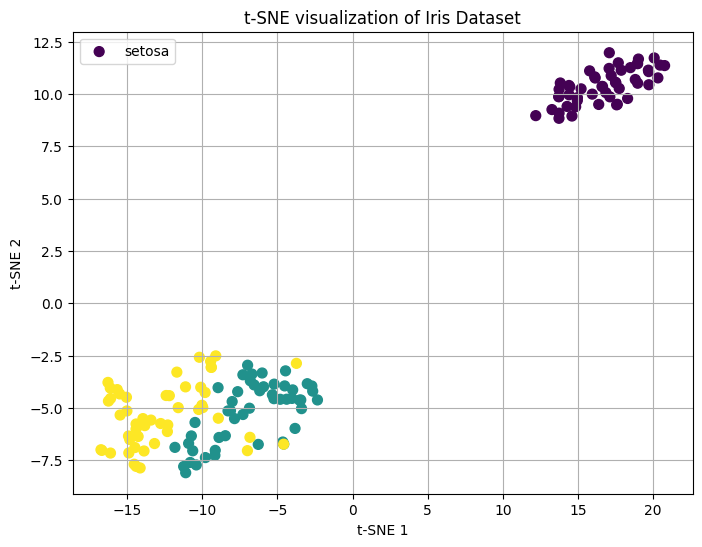

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features (4D)
y = iris.target  # Labels (3 classes)

# Optional: Standardize the features for better results
X_scaled = StandardScaler().fit_transform(X)

# Apply t-SNE to reduce to 2 dimensions
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Plot the 2D representation
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', s=50)
plt.title("t-SNE visualization of Iris Dataset")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")

# Update legend code to extract handles and labels correctly
handles, labels = scatter.legend_elements()
plt.legend(handles, labels=iris.target_names)

plt.grid(True)
plt.show()

# UMAP

UMAP is a powerful dimensionality reduction technique, similar to t-SNE, but it's generally faster and can scale to much larger datasets.

It focuses on preserving both local and global structures of the data, unlike t-SNE, which primarily emphasizes local structure.

https://arxiv.org/pdf/1802.03426

https://www.geeksforgeeks.org/umap-uniform-manifold-approximation-and-projection

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
<ipython-input-18-7c184a9c4624>:27: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  plt.legend(handles, labels=iris.target_names)


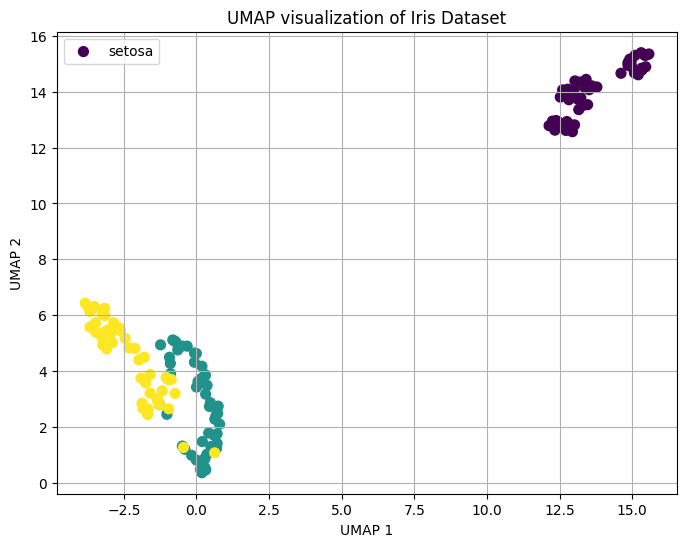

In [ ]:
import umap
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features (4D)
y = iris.target  # Labels (3 classes)

# Optional: Standardize the features for better results
X_scaled = StandardScaler().fit_transform(X)

# Apply UMAP to reduce to 2 dimensions
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)

# Plot the 2D representation
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='viridis', s=50)
plt.title("UMAP visualization of Iris Dataset")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")

# Add legend
handles, labels = scatter.legend_elements()
plt.legend(handles, labels=iris.target_names)

plt.grid(True)
plt.show()